In [41]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier,NeighborhoodComponentsAnalysis,LocalOutlierFactor
from sklearn.decomposition import PCA


In [77]:
df = pd.read_csv(r'data.csv')

In [78]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [80]:
df.drop(["id","Unnamed: 32"],inplace=True,axis=1)

In [81]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [83]:
df=df.rename(columns={"diagnosis":"target"})
print(df.target.value_counts())

target
B    357
M    212
Name: count, dtype: int64


In [84]:
df["target"]=[1 if i.strip()=="M" else 0 for i in df["target"]]
df.head()

,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<Axes: >

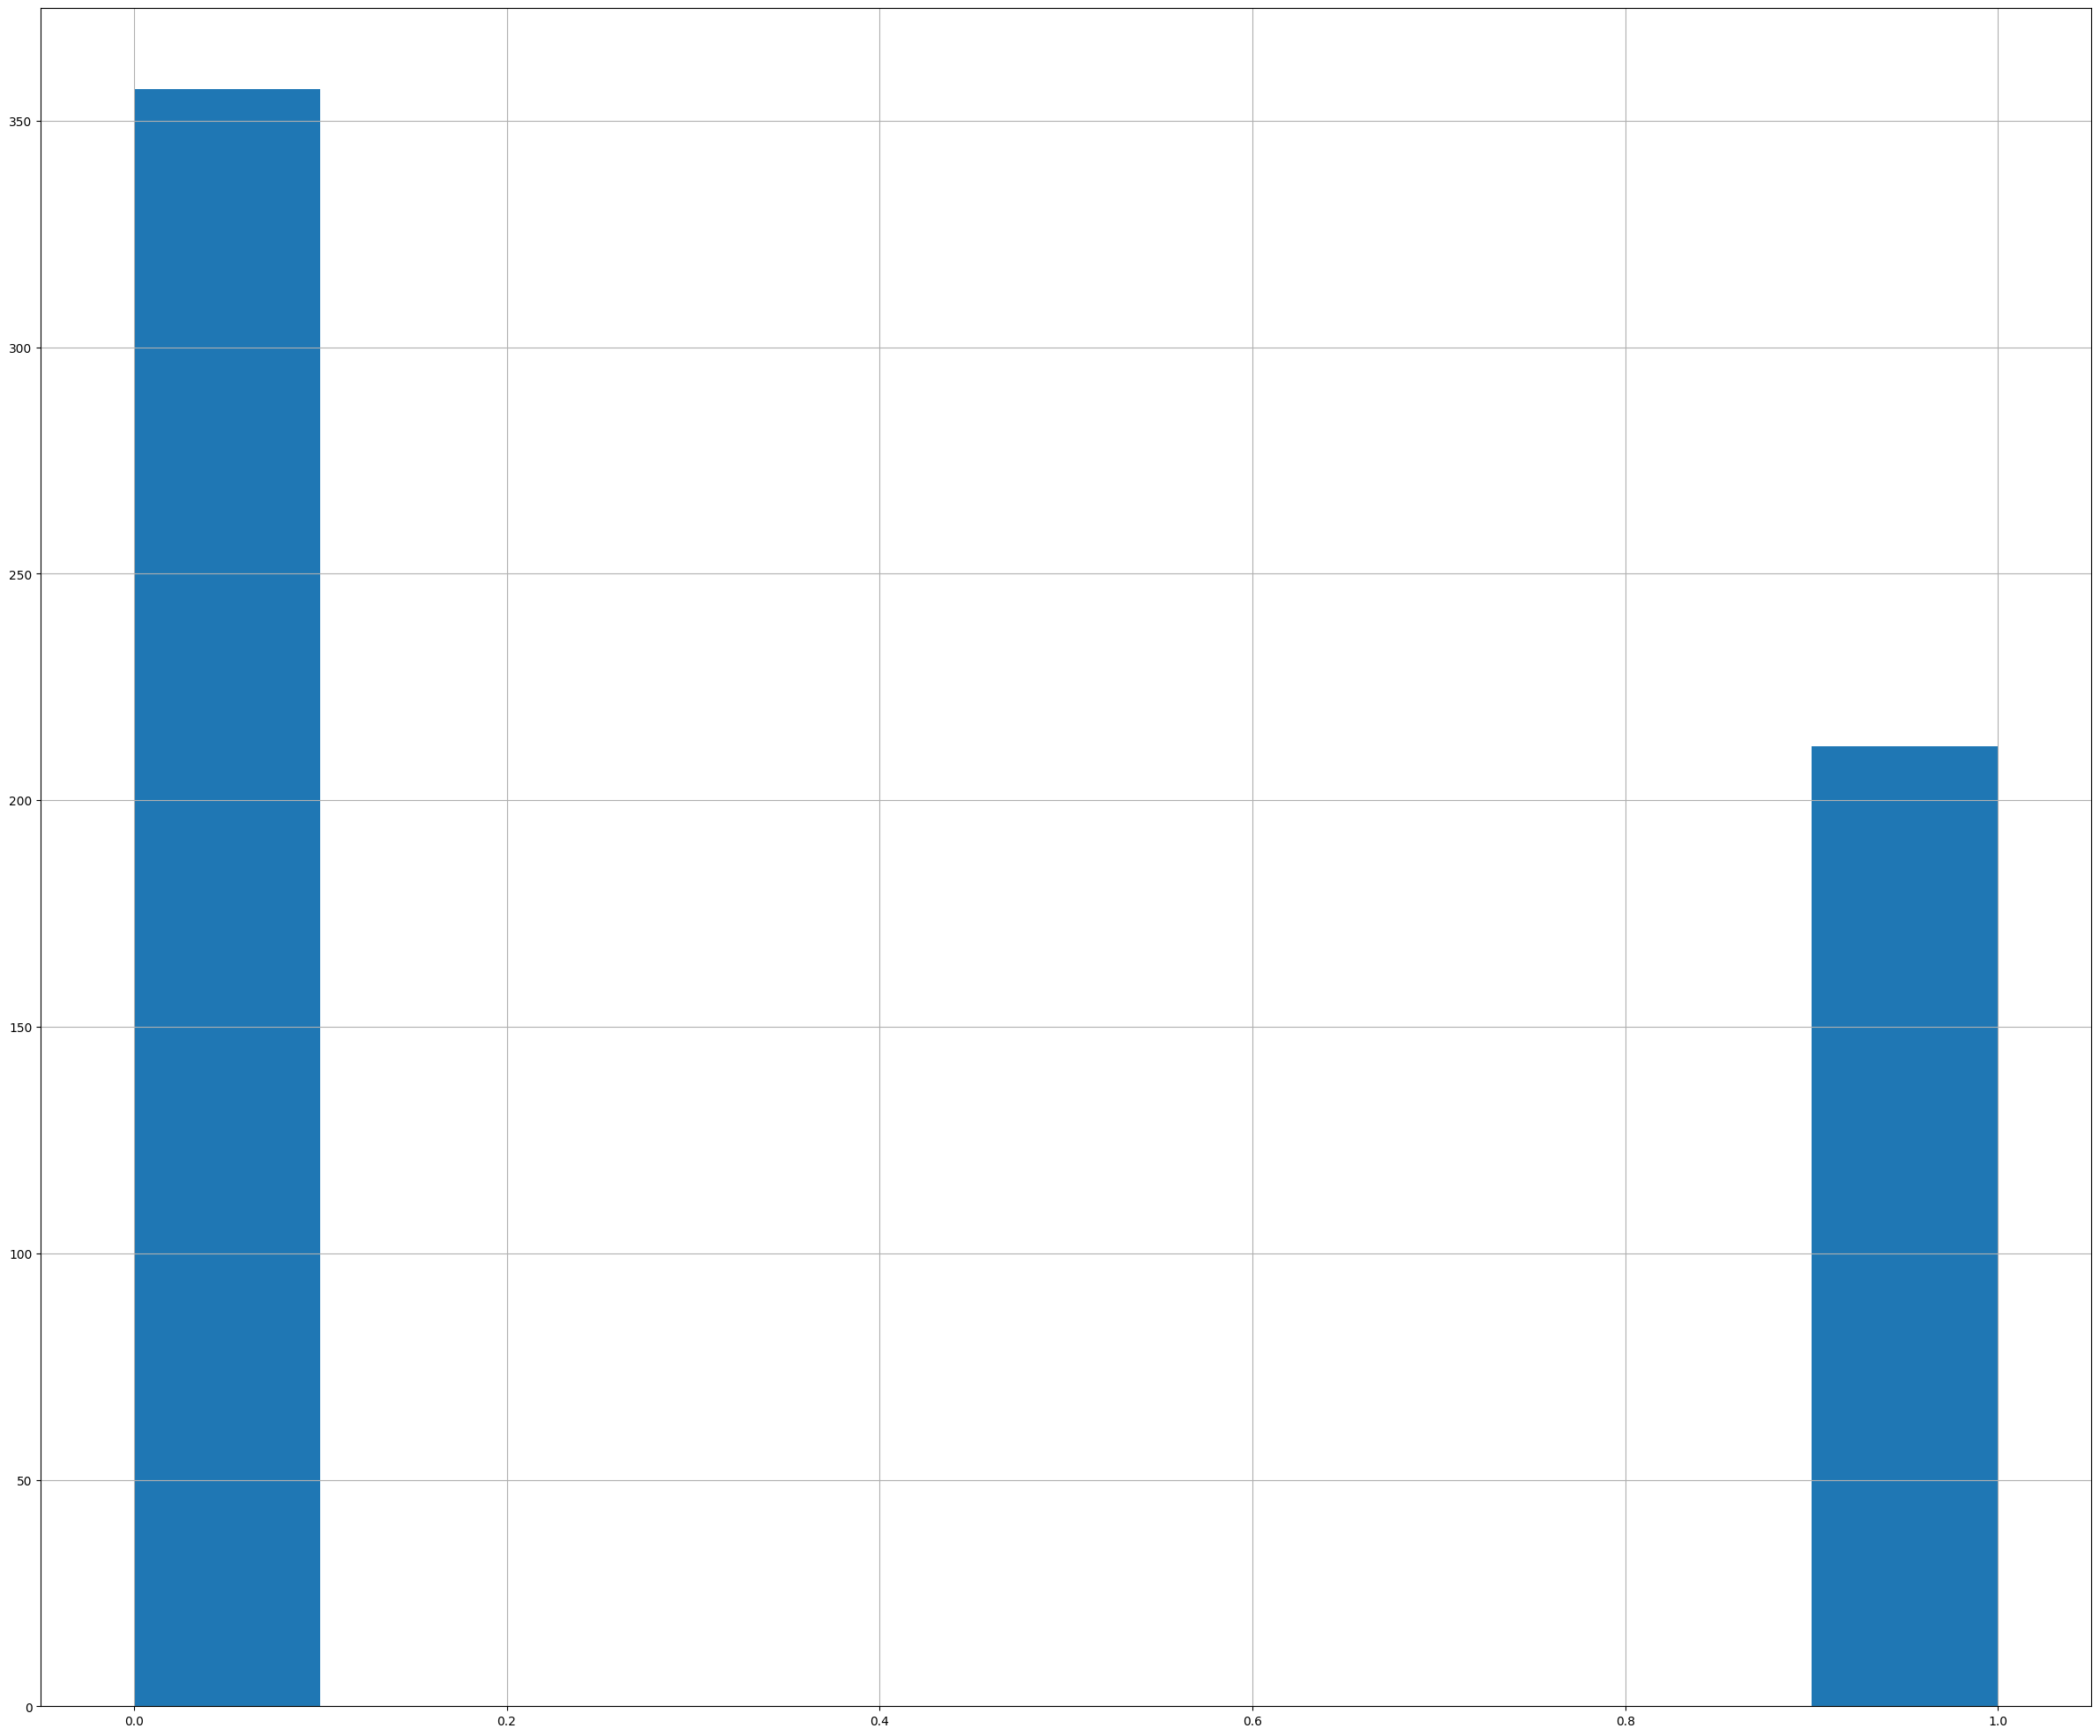

In [85]:
df.target.hist()

<Axes: >

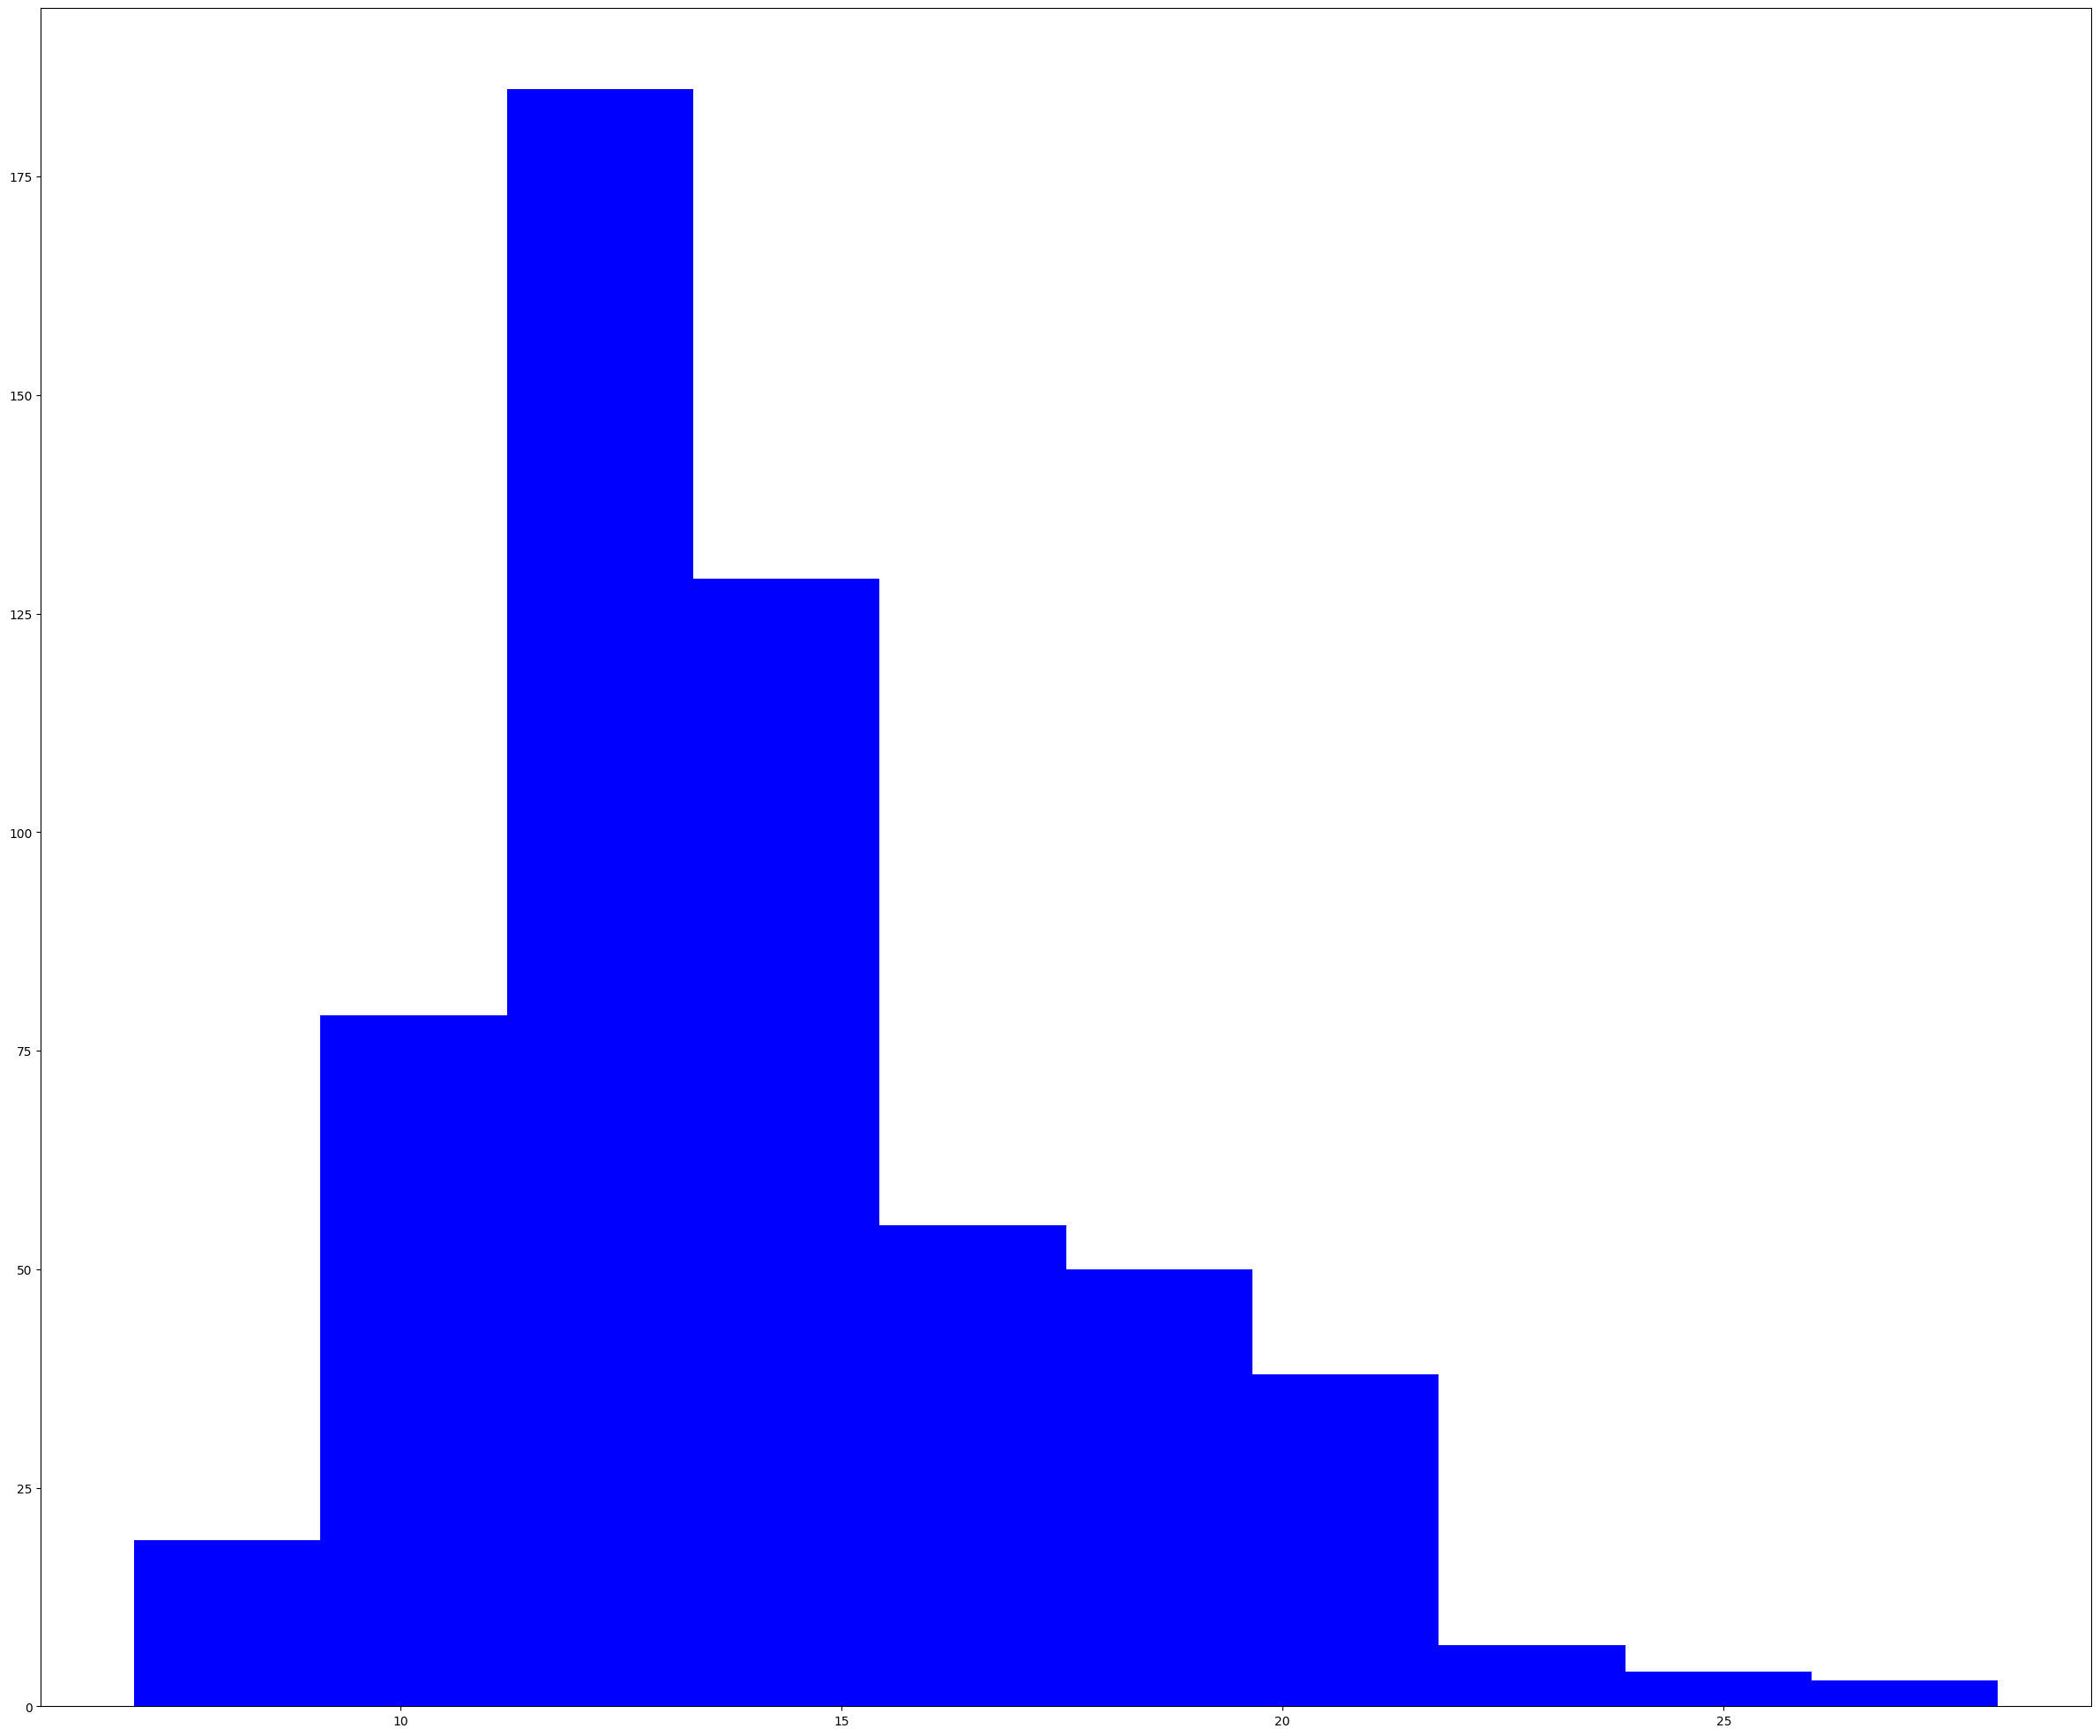

In [86]:
df.radius_mean.hist(color='blue', grid=False)

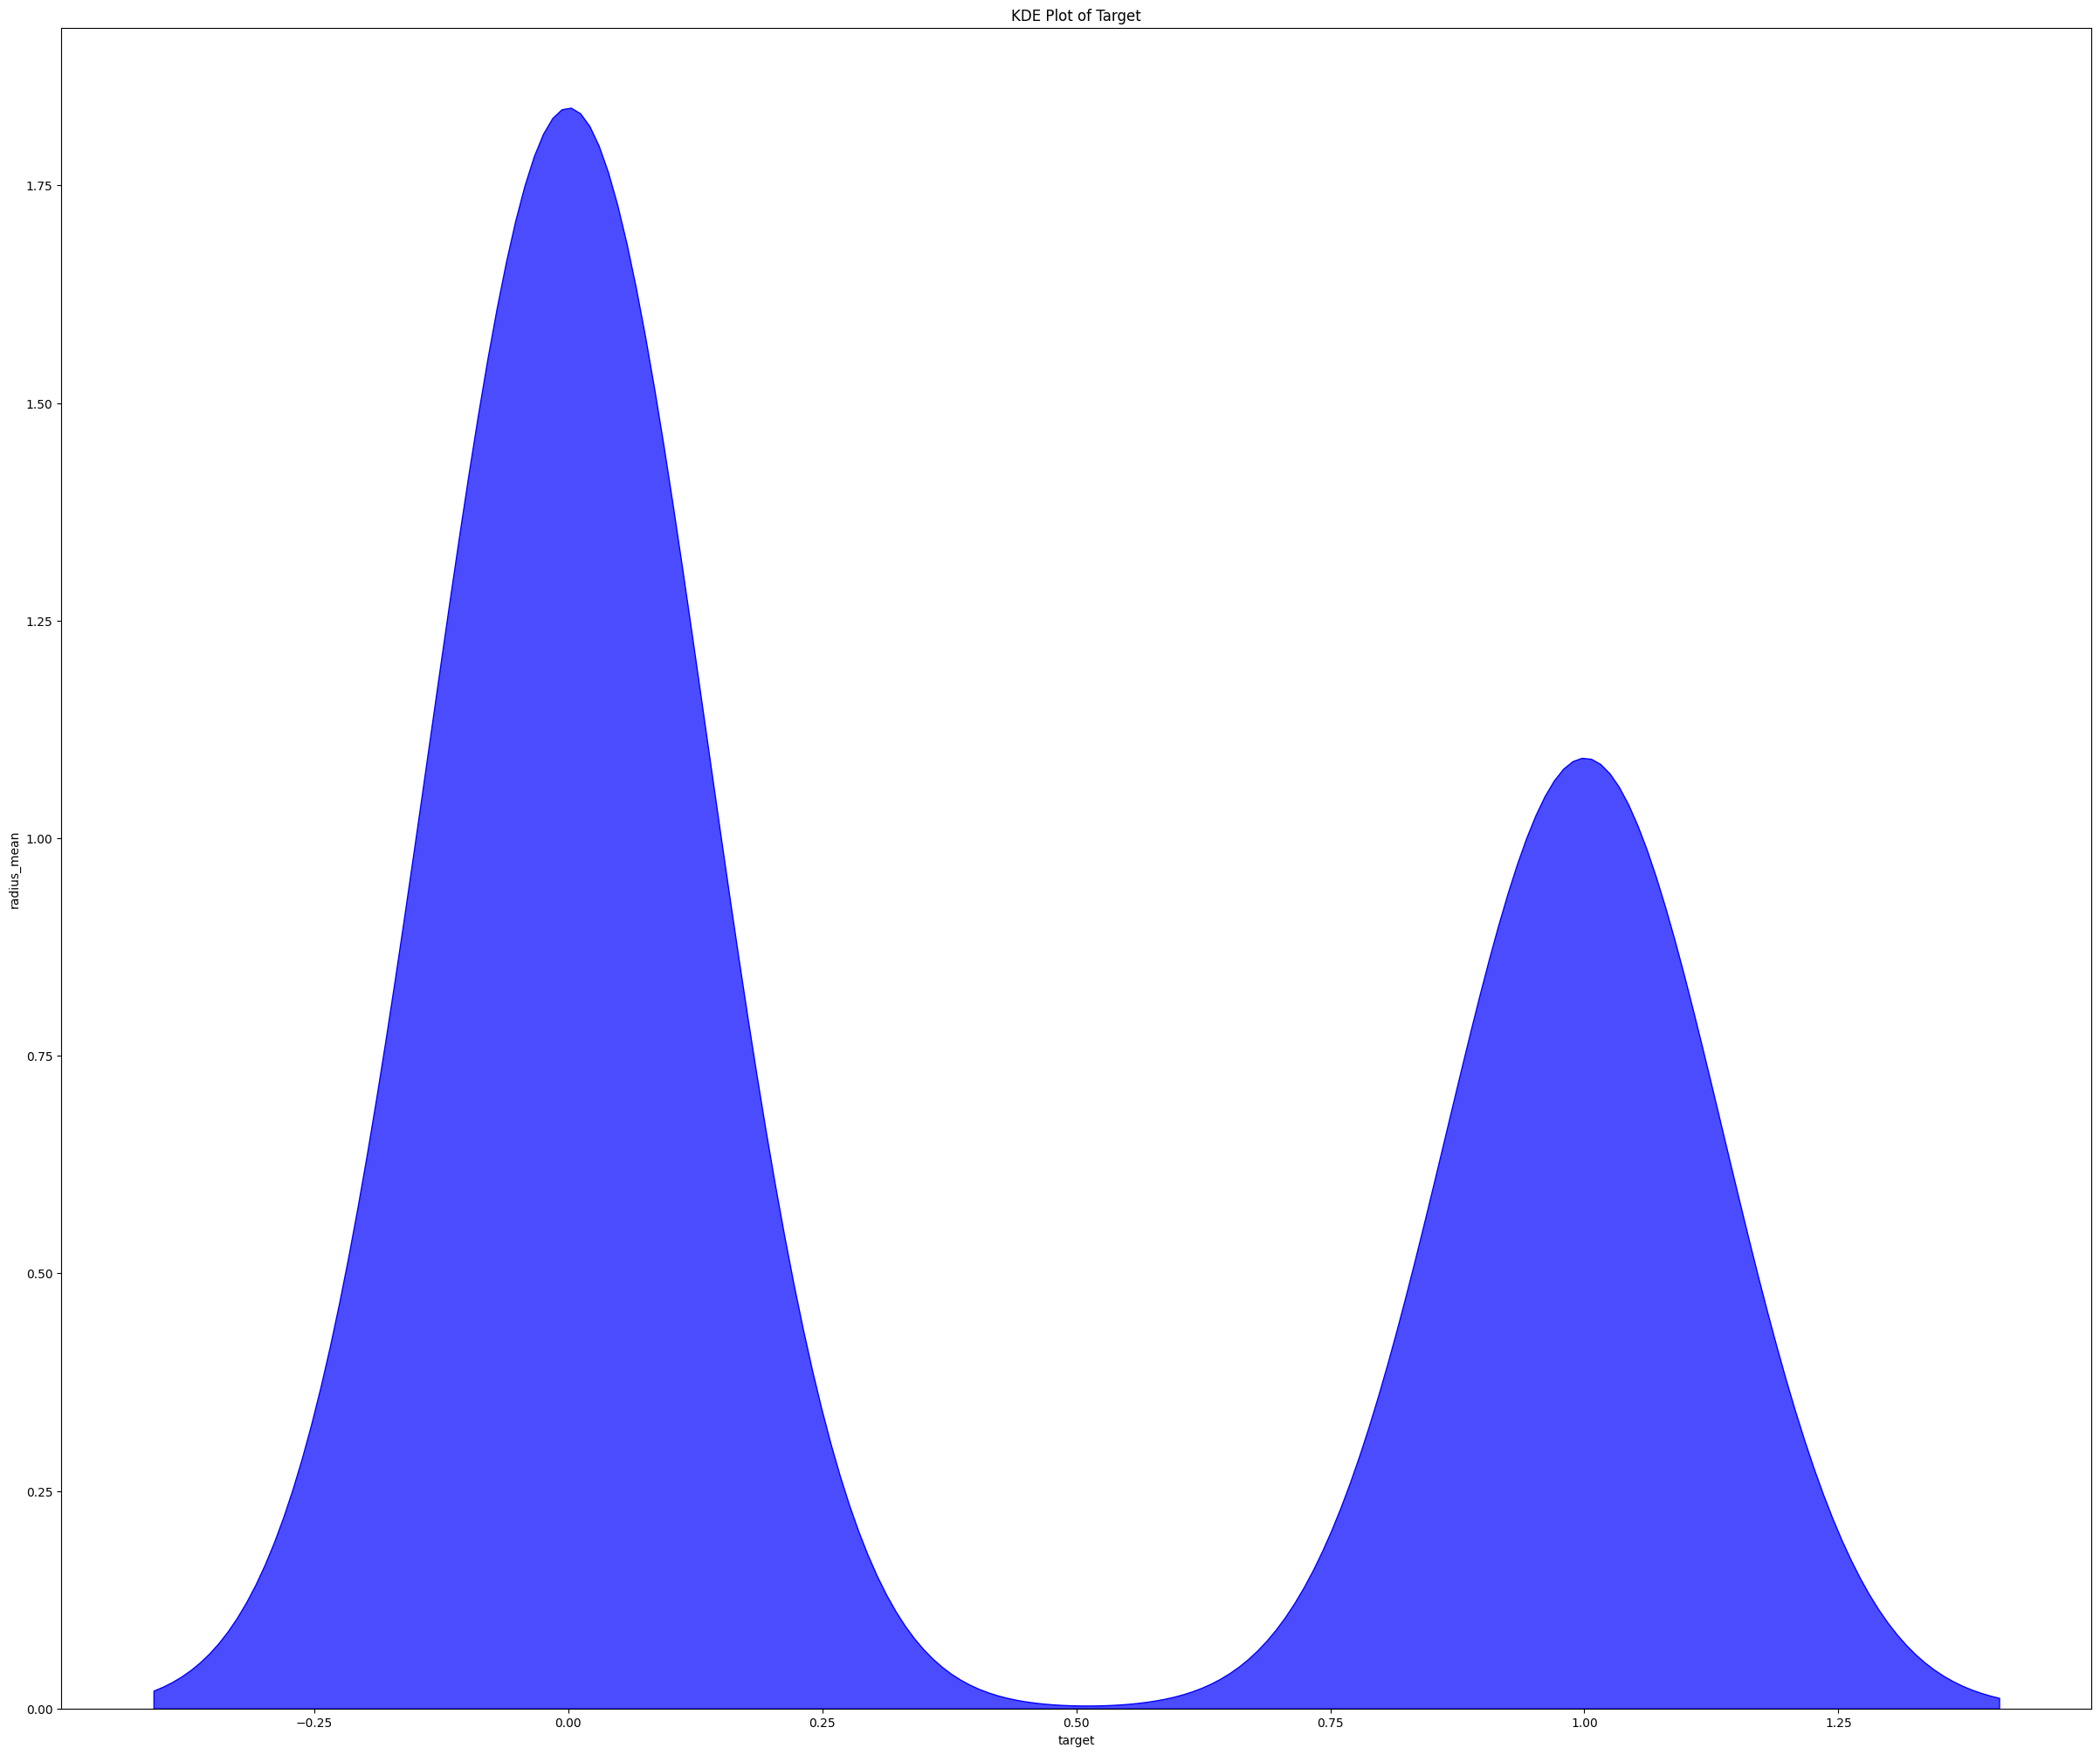

In [87]:
sns.kdeplot(df.target, fill=True, color='blue', alpha=0.7)

plt.xlabel('target')
plt.ylabel('radius_mean')
plt.title('KDE Plot of Target')

plt.show()

In [90]:
print(len(df))
print("Data Shape ",df.shape)
df.info()
print("Data Describe",df.describe())

569
Data Shape  (569, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   target                   569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  

In [91]:
df.corr()

,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
target,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


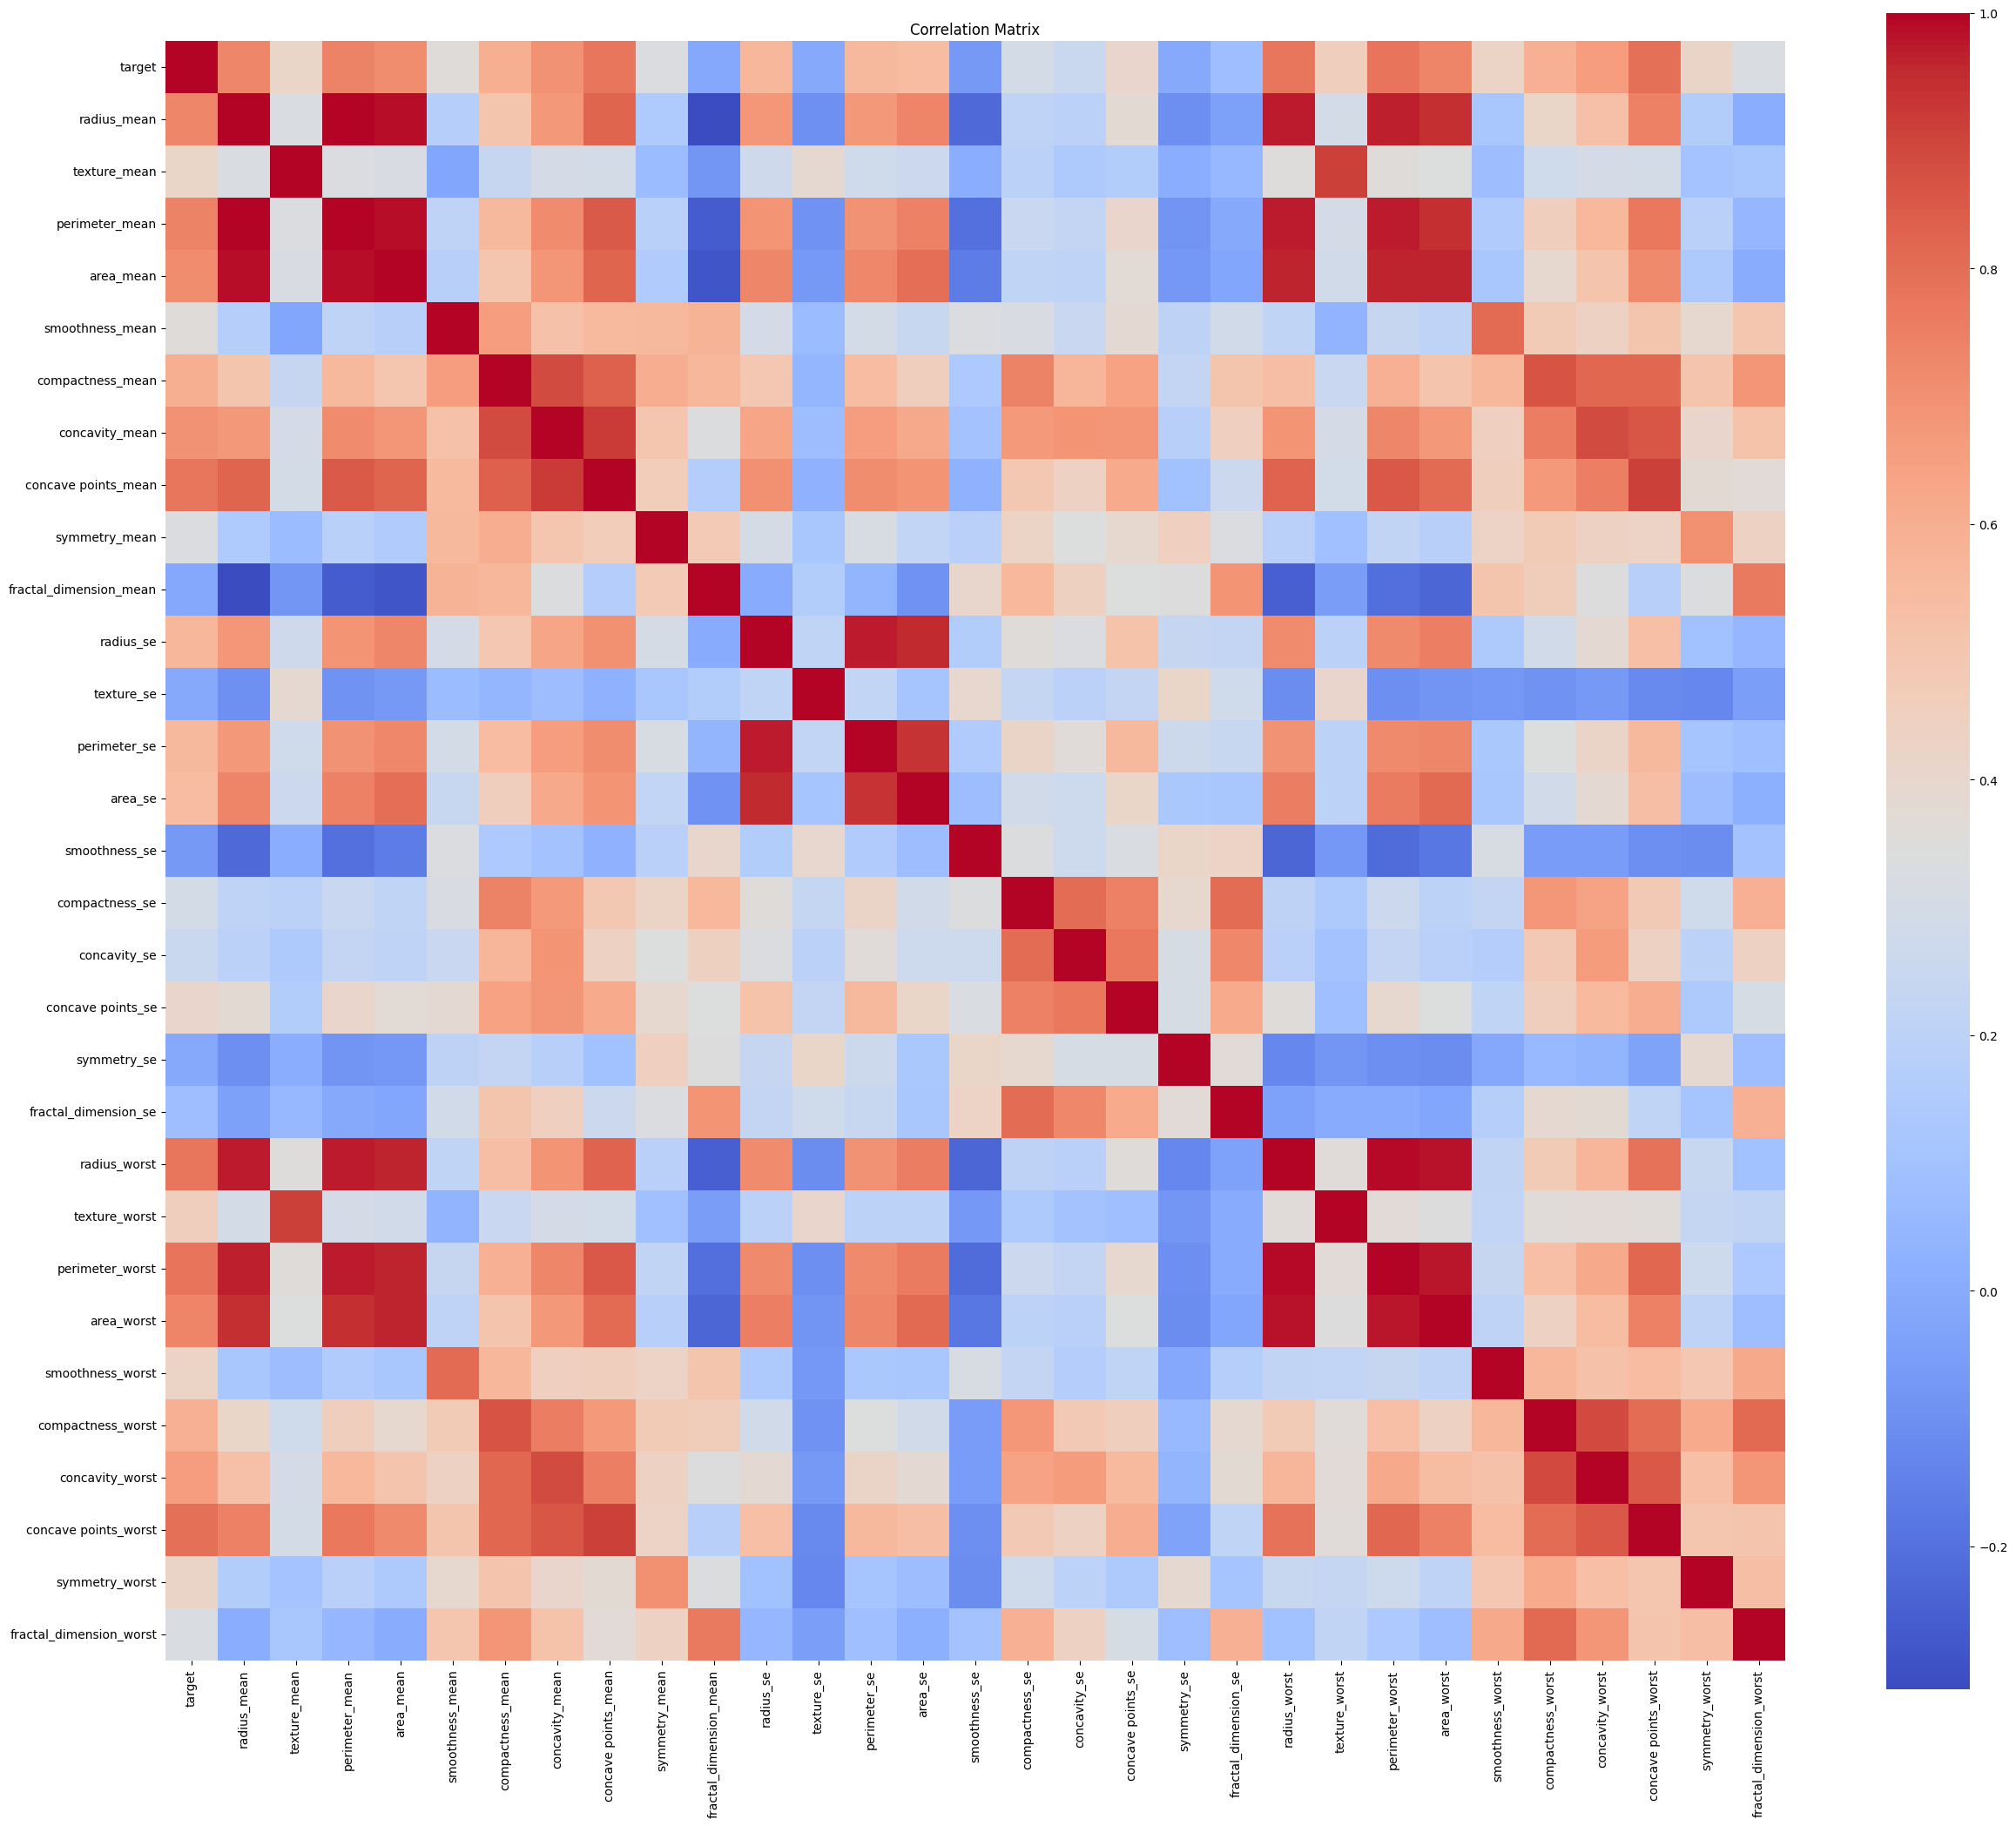

In [92]:
corr_matrix=df.corr()
sns.heatmap(corr_matrix,annot=False, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix')
plt.show()

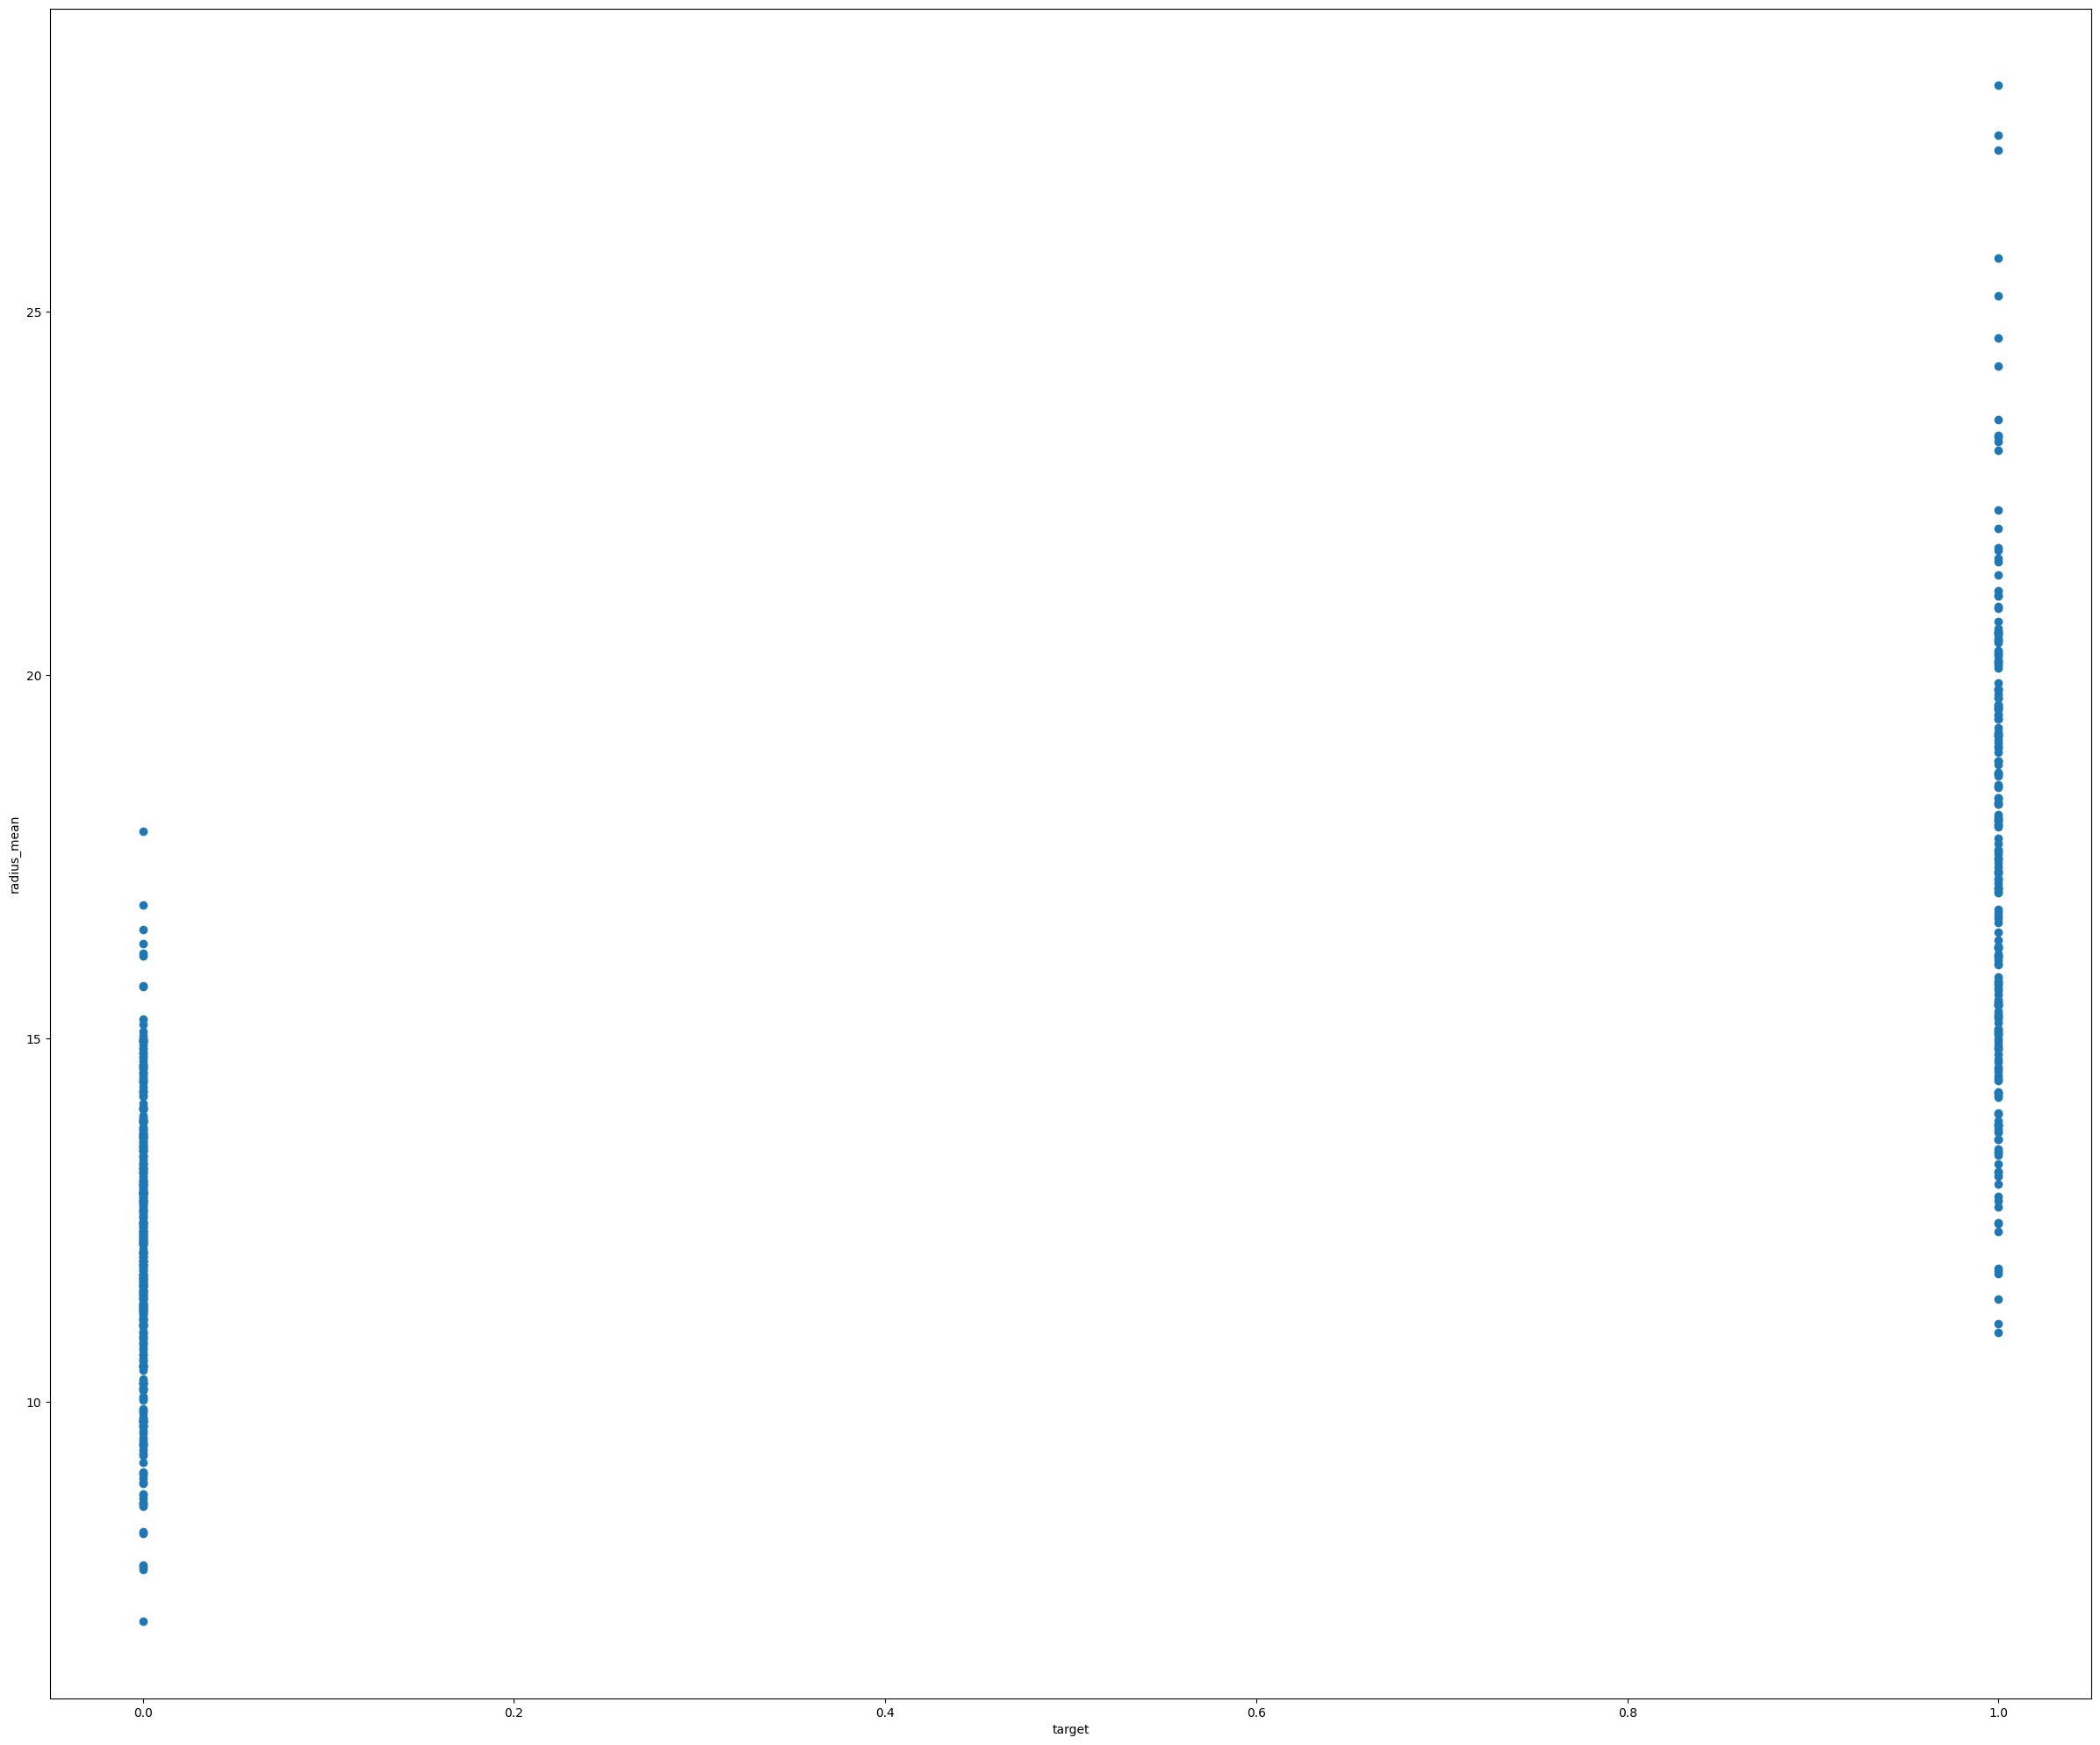

In [93]:
plt.scatter(df.target, df.radius_mean)

plt.xlabel('target')
plt.ylabel('radius_mean')
plt.show()

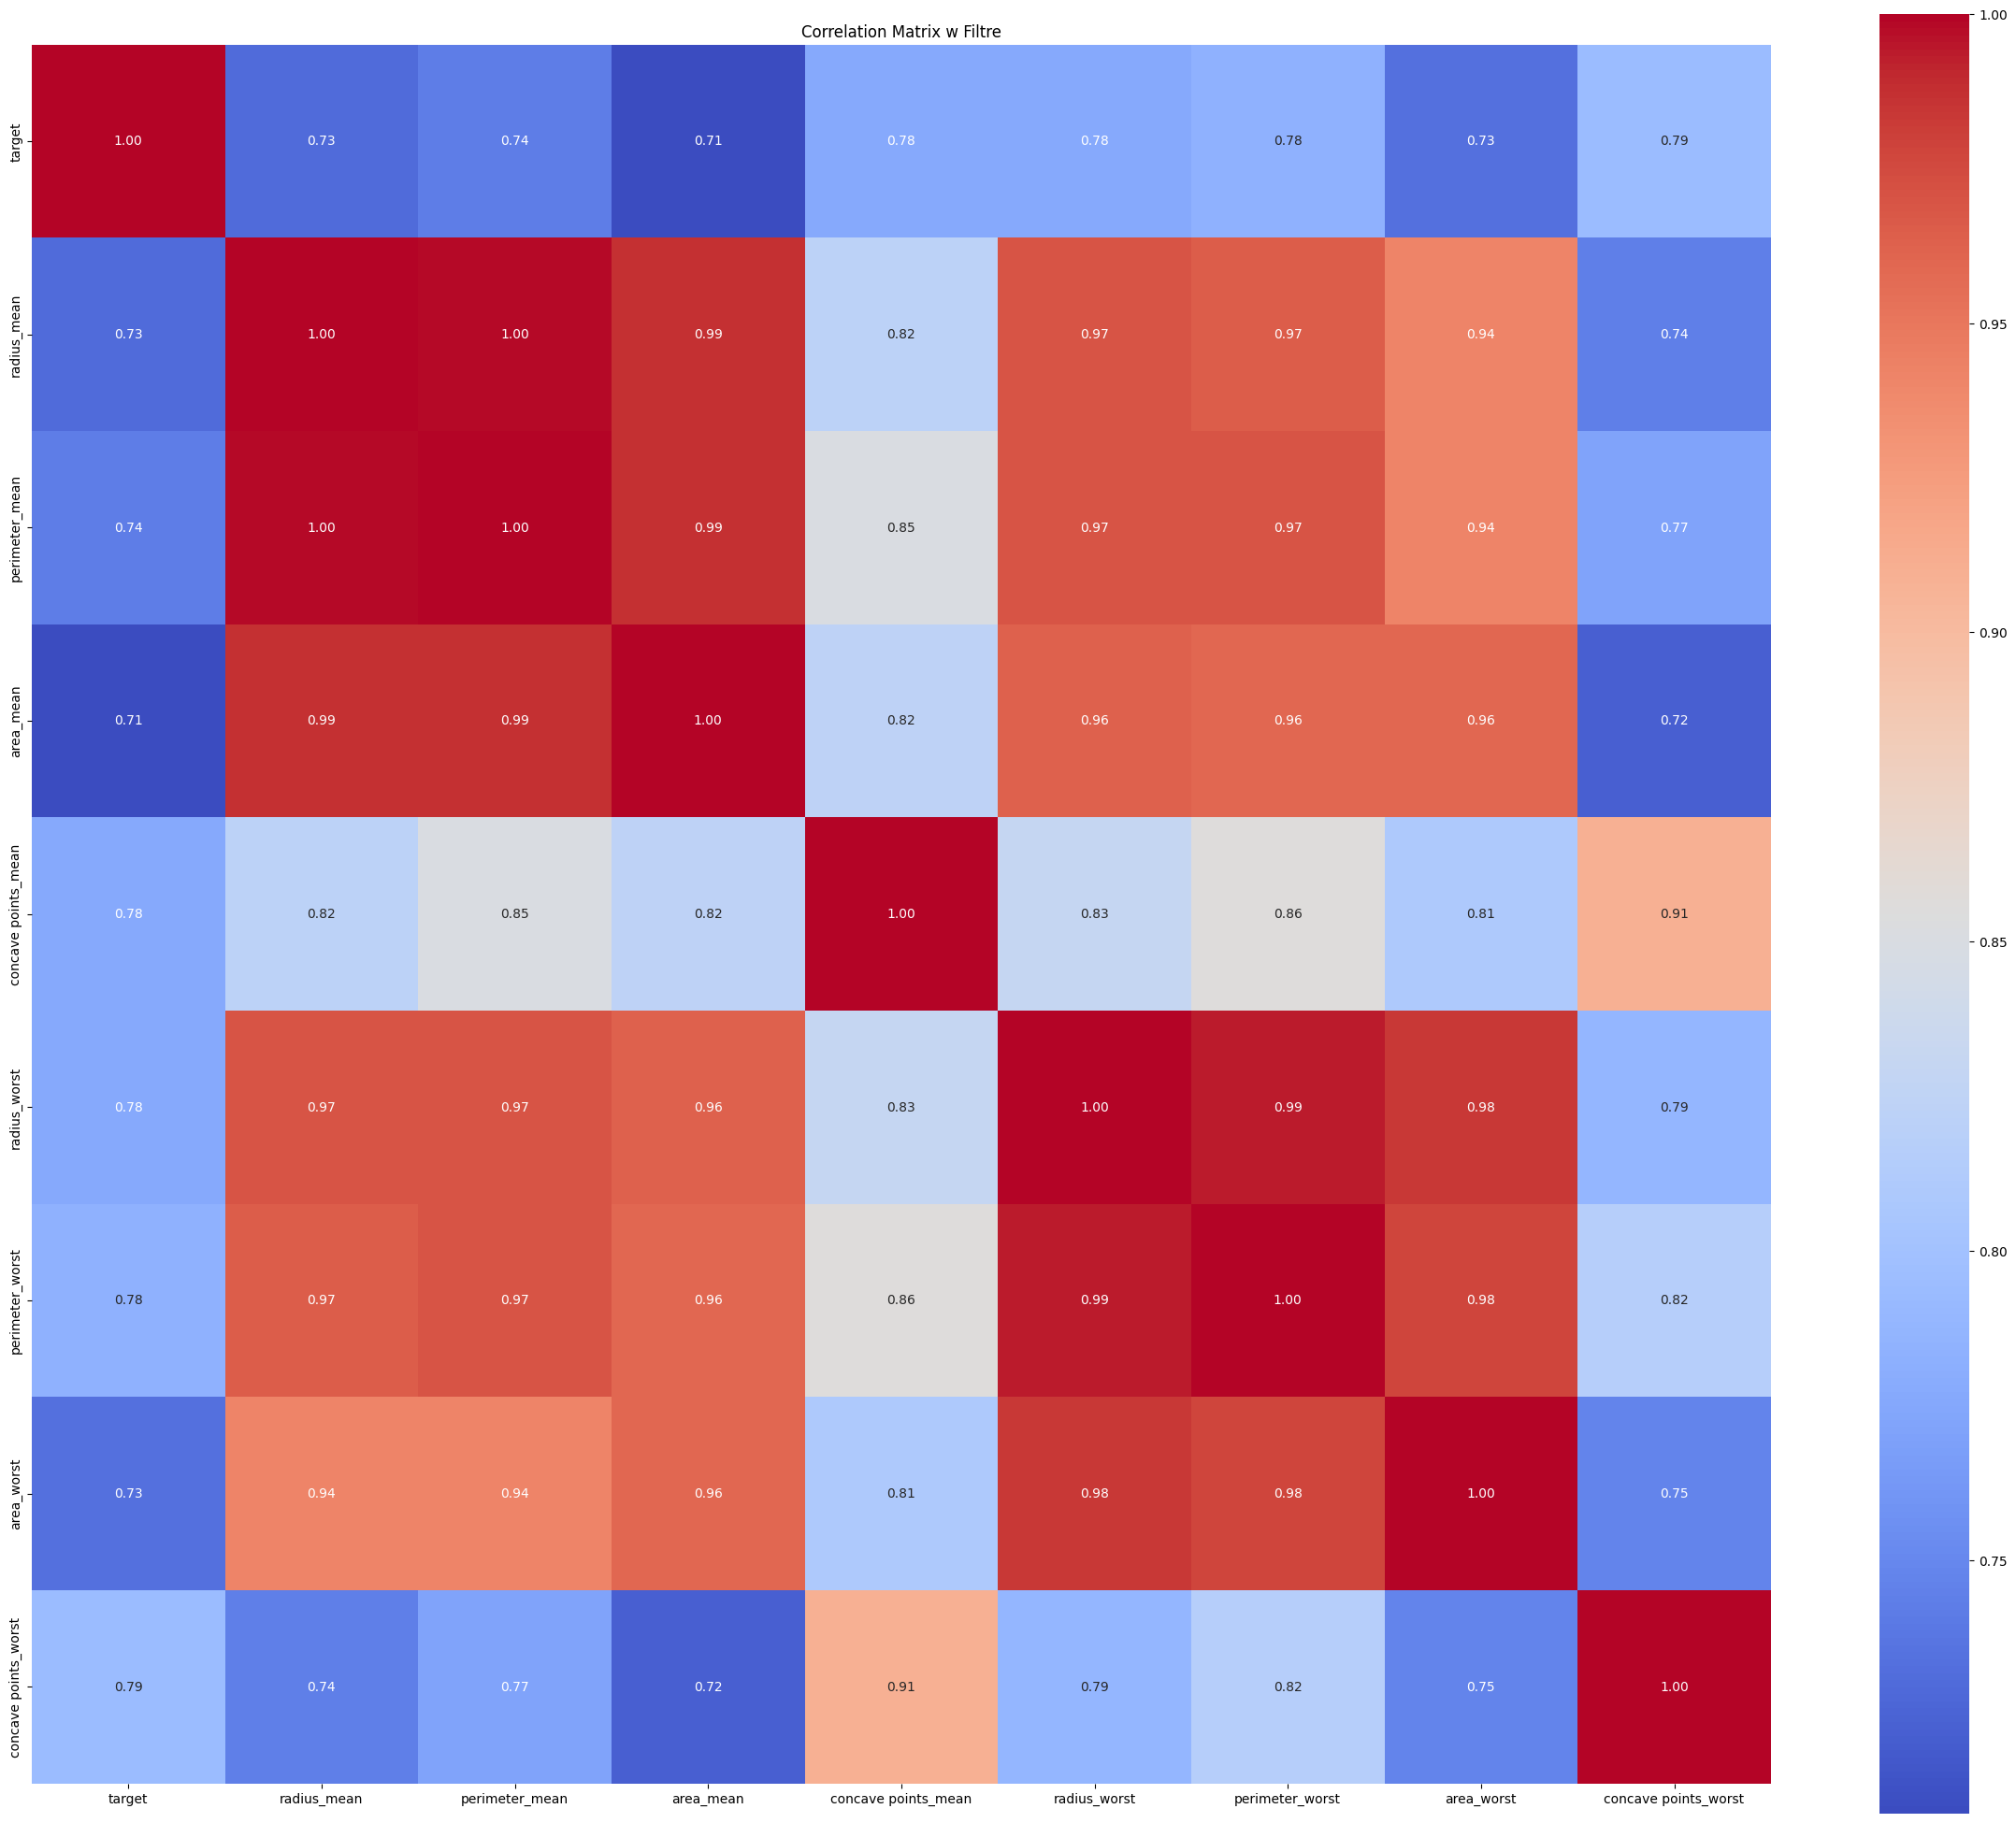

In [94]:
threshold=0.70
filtre=np.abs(corr_matrix["target"])>threshold
corr_features=corr_matrix.columns[filtre].tolist()
sns.heatmap(df[corr_features].corr(),annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix w Filtre')
plt.show()

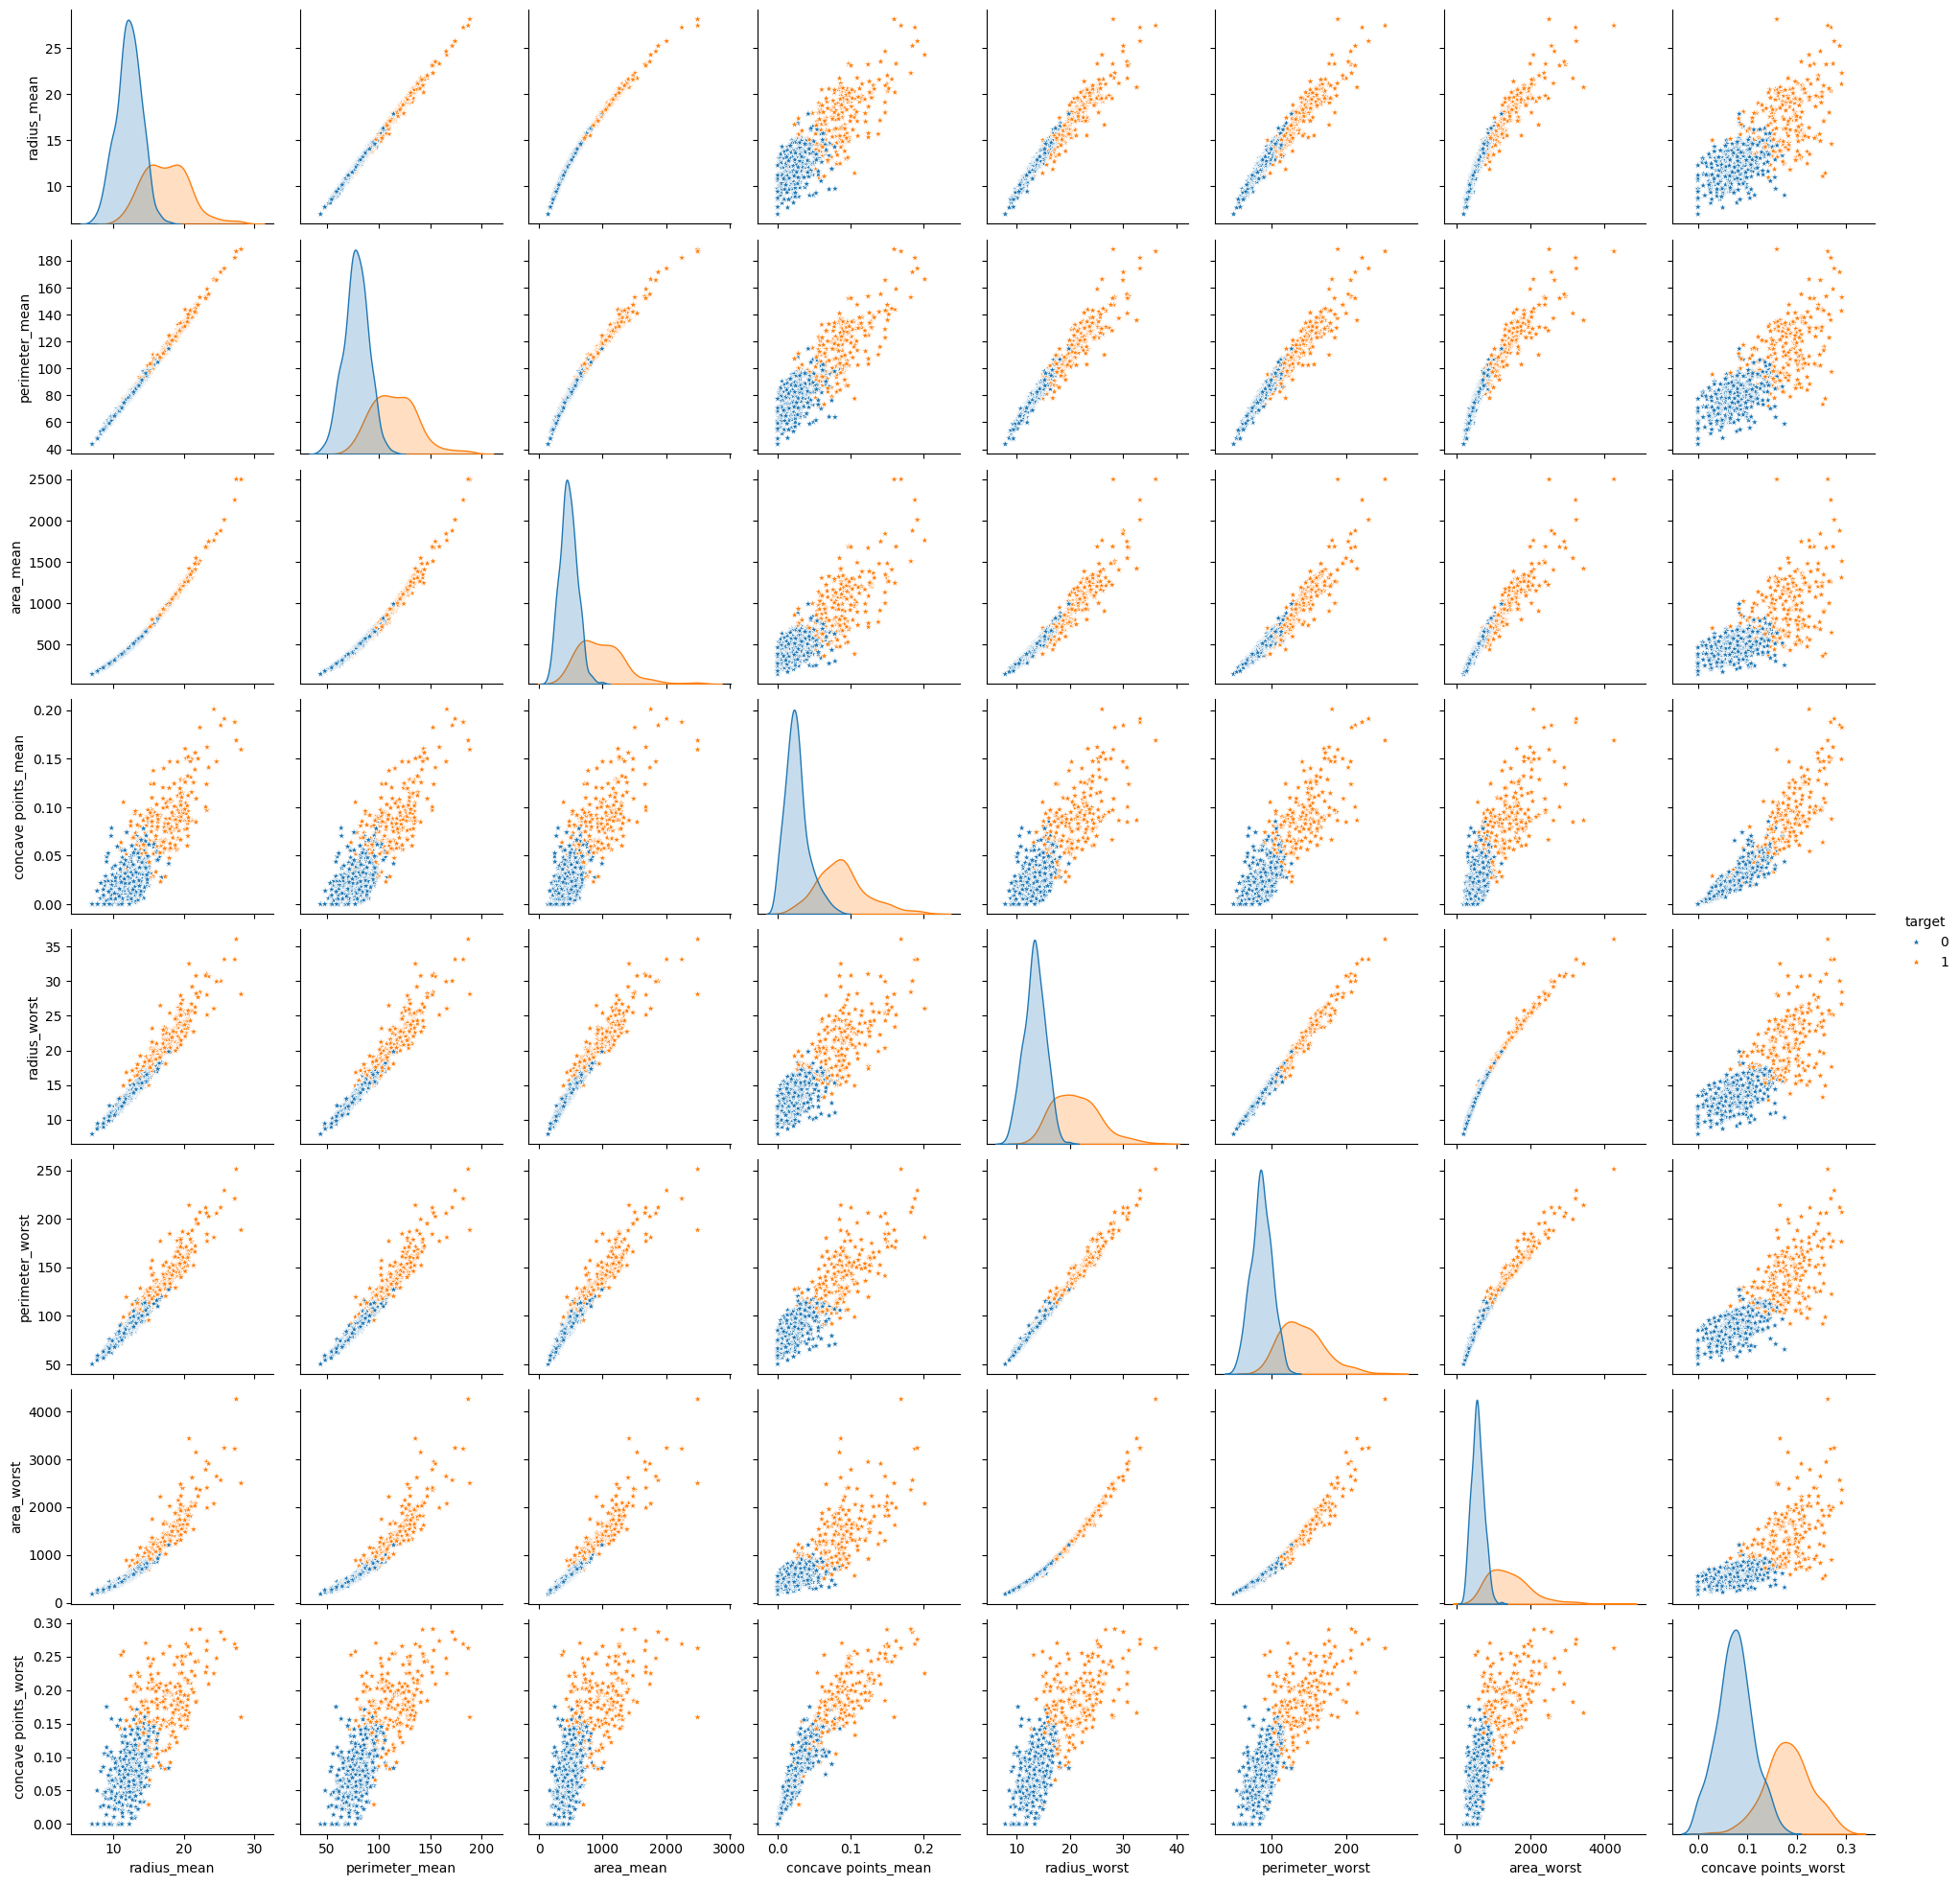

In [95]:
sns.pairplot(df[corr_features],diag_kind="kde",markers="*",hue="target")
plt.show()


In [96]:
y=df.target
x=df.drop(["target"],axis=1)
coulumns=x.columns.tolist()

In [97]:
clf=LocalOutlierFactor()
out_predict=clf.fit_predict(x)
X_score=clf.negative_outlier_factor_
outlier_score=pd.DataFrame()
outlier_score["Score"]=X_score
outlier_score["Score"].head(20)

0    -1.422440
1    -1.066782
2    -0.978948
3    -1.596933
4    -1.069936
5    -1.773071
6    -1.015687
7    -1.251746
8    -1.380515
9    -1.644357
10   -0.997602
11   -1.061786
12   -1.129491
13   -1.258444
14   -0.968637
15   -1.093351
16   -1.139381
17   -1.060493
18   -1.410671
19   -0.972248
Name: Score, dtype: float64

In [99]:
threshold=-2.5
filtre=outlier_score["Score"]<threshold
outlier_index=outlier_score[filtre].index.tolist()

<function matplotlib.pyplot.show(close=None, block=None)>

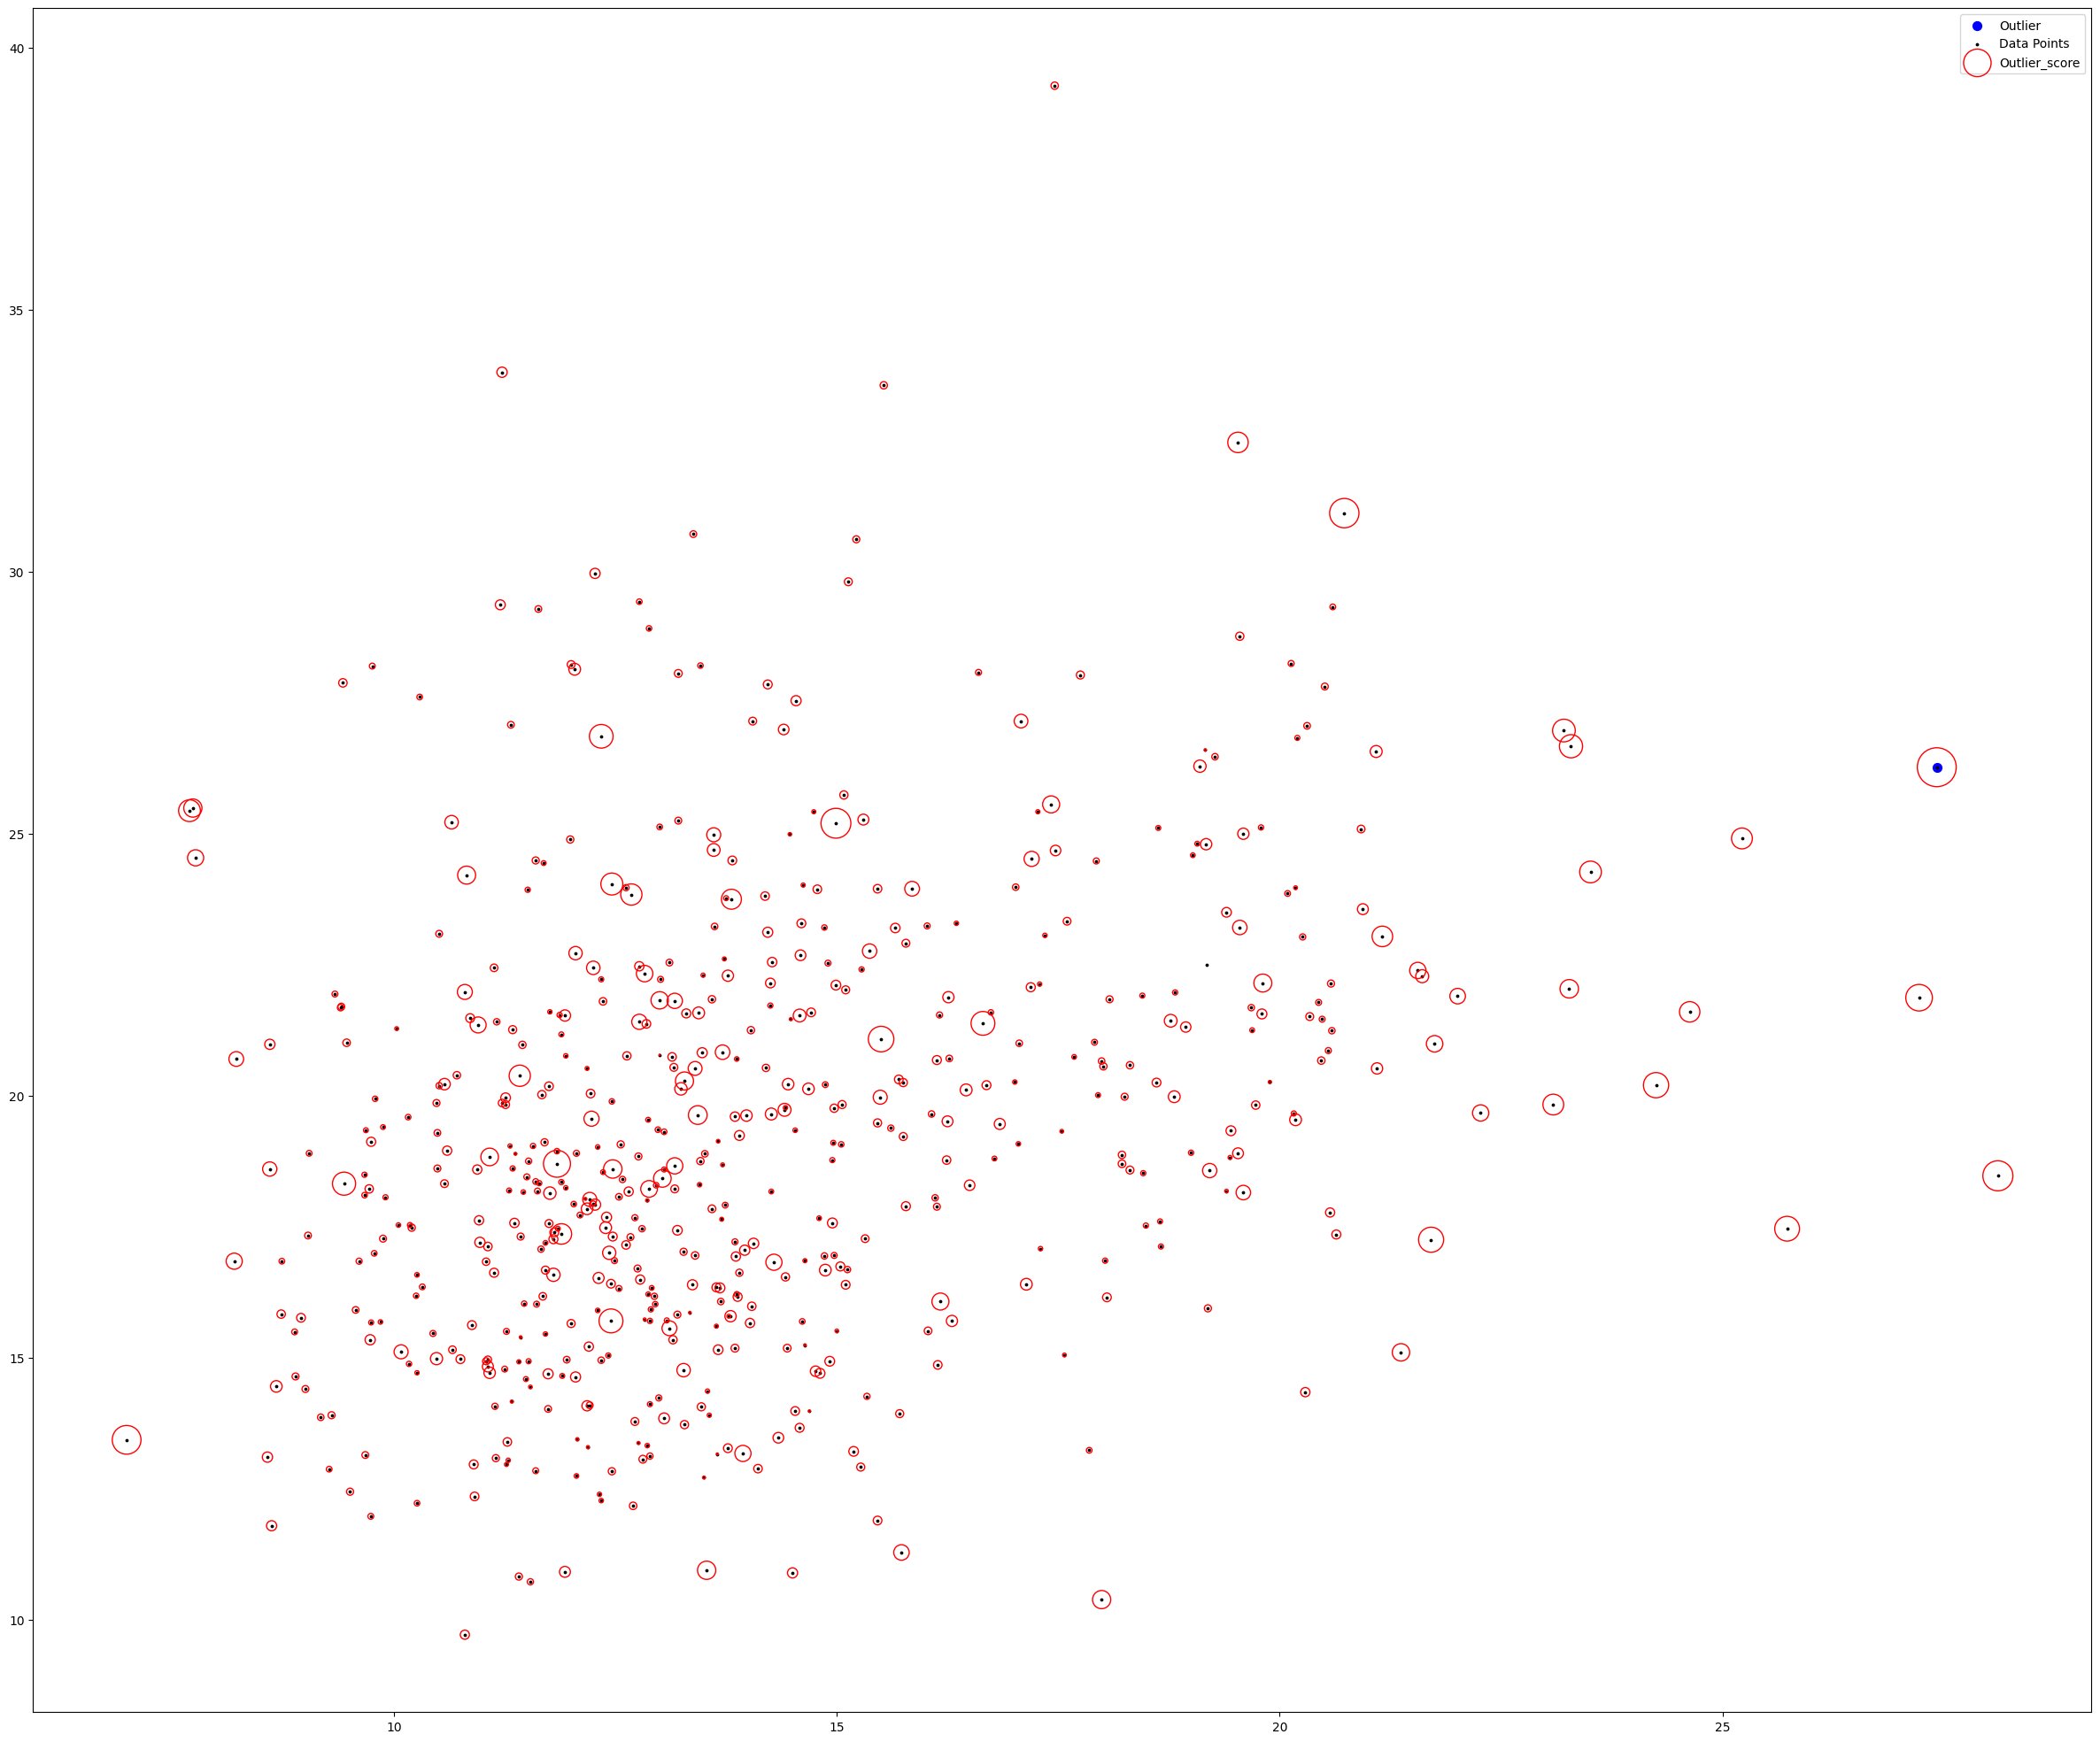

In [100]:
plt.figure()
plt.scatter(x.iloc[outlier_index,0],x.iloc[outlier_index,1],color="blue",s=50,label="Outlier")
plt.scatter(x.iloc[:,0],x.iloc[:,1],color="k",s=3,label="Data Points")
radius=(X_score.max()-X_score)/(X_score.max()-X_score.min())
outlier_score["radius"]=radius
plt.scatter(x.iloc[:,0],x.iloc[:,1],color="r",s=1000*radius,label="Outlier_score",facecolors="none")
plt.legend()
plt.show

In [101]:
x=x.drop(outlier_index)
y=y.drop(outlier_index).values

In [102]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,random_state=42,test_size=0.3)



In [103]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
mms=MinMaxScaler()
X_train=mms.fit_transform(X_train)
X_test=mms.transform(X_test)

In [104]:
X_train_df=pd.DataFrame(X_train,columns=coulumns)
X_train_df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,...,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,0.298019,0.318938,0.286640,0.196618,0.335300,0.285724,0.203125,0.241791,0.342661,0.263260,...,0.302097,0.358328,0.291866,0.211959,0.370313,0.236067,0.280821,0.415087,0.259801,0.240333
std,0.174257,0.146799,0.175759,0.150995,0.139601,0.174551,0.180619,0.187452,0.146561,0.152244,...,0.194625,0.165691,0.187468,0.182400,0.167174,0.165719,0.208028,0.233214,0.123949,0.148265
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.175507,0.212039,0.162612,0.094593,0.236495,0.151873,0.067737,0.102087,0.241324,0.154482,...,0.169493,0.233742,0.160440,0.092121,0.244623,0.124925,0.124001,0.232293,0.177016,0.137589
50%,0.255442,0.302672,0.241884,0.151540,0.321538,0.242141,0.138918,0.168986,0.337427,0.236279,...,0.249318,0.348881,0.239270,0.149471,0.363471,0.189225,0.229147,0.362591,0.244037,0.204815
75%,0.383641,0.401759,0.380315,0.254717,0.420161,0.380179,0.287254,0.367992,0.424453,0.336936,...,0.396972,0.470149,0.391833,0.264504,0.472111,0.335089,0.404389,0.585631,0.319141,0.306884
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


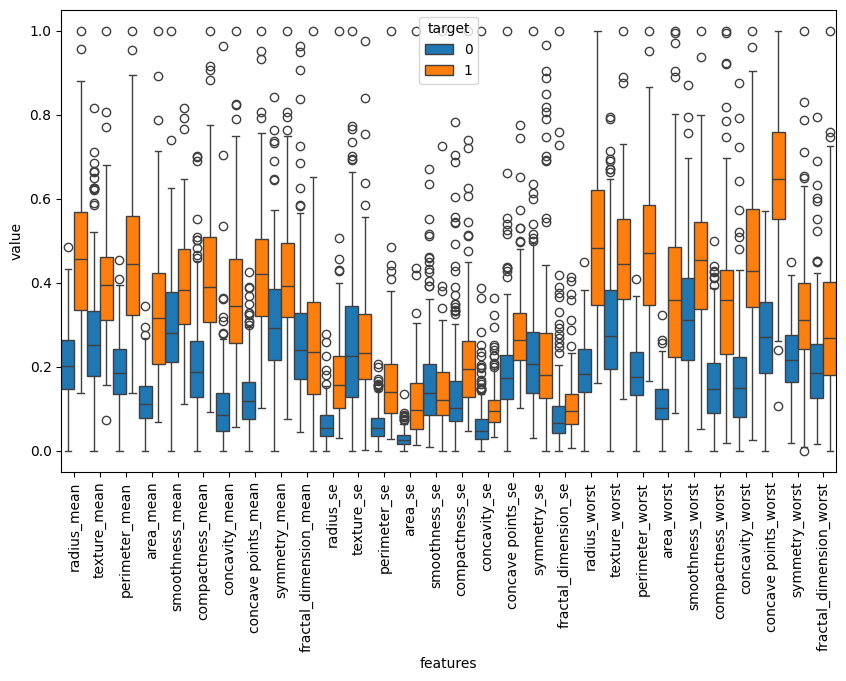

In [105]:
plt.figure(figsize=(10, 6))
X_train_df["target"]=Y_train
data_melted=pd.melt(X_train_df,id_vars="target",var_name="features",value_name="value")
sns.boxplot(x="features",y="value",hue="target",data=data_melted,width=1,saturation=1)
plt.xticks(rotation=90)
plt.show()

In [107]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,Y_train)
Y_pred=knn.predict(X_test)
acc=accuracy_score(Y_test,Y_pred)
cm=confusion_matrix(Y_test,Y_pred)
score=knn.score(X_test,Y_test)
score1=knn.score(X_train,Y_train)
print("Score_Test ",score)
print("Score_Train ",score1)
print("Accuracy ",acc)
print("cm ",cm)

Score_Test  0.9649122807017544
Score_Train  0.9748110831234257
Accuracy  0.9649122807017544
cm  [[108   1]
 [  5  57]]


In [108]:
def Knn_Best_Params(x_train,x_test,y_train,y_test):
    k_range=list(range(1,40))
    weight_options=["uniform","distance"]
    p_options=[1,2]
    param_grid=dict(n_neighbors=k_range,weights=weight_options,p=p_options)
    knn=KNeighborsClassifier()
    grid=GridSearchCV(knn,param_grid,cv=20,scoring="accuracy")
    grid.fit(x_train,y_train)
    print("Best Score {} with parameters {}".format(grid.best_score_,grid.best_params_))
    print()

    knn=KNeighborsClassifier(**grid.best_params_)
    knn.fit(x_train,y_train)
    y_pred_test=knn.predict(x_test)
    y_pred_train=knn.predict(x_train)
    acc_test=accuracy_score(y_test,y_pred_test)
    acc_train=accuracy_score(y_train,y_pred_train)
    print("Test Score {} Train Score {}".format(acc_test,acc_train))

    return grid


grid=Knn_Best_Params(X_train,X_test,Y_train,Y_test)



Best Score 0.9721052631578948 with parameters {'n_neighbors': 4, 'p': 2, 'weights': 'uniform'}

Test Score 0.9766081871345029 Train Score 0.9748110831234257


In [109]:
x_scaled=scaler.fit_transform(x)
pca=PCA(n_components=2)
X_reduced_pca=pca.fit_transform(x_scaled)
pca_data=pd.DataFrame(columns=["p1","p2"],data=X_reduced_pca)
pca_data["target"]=y

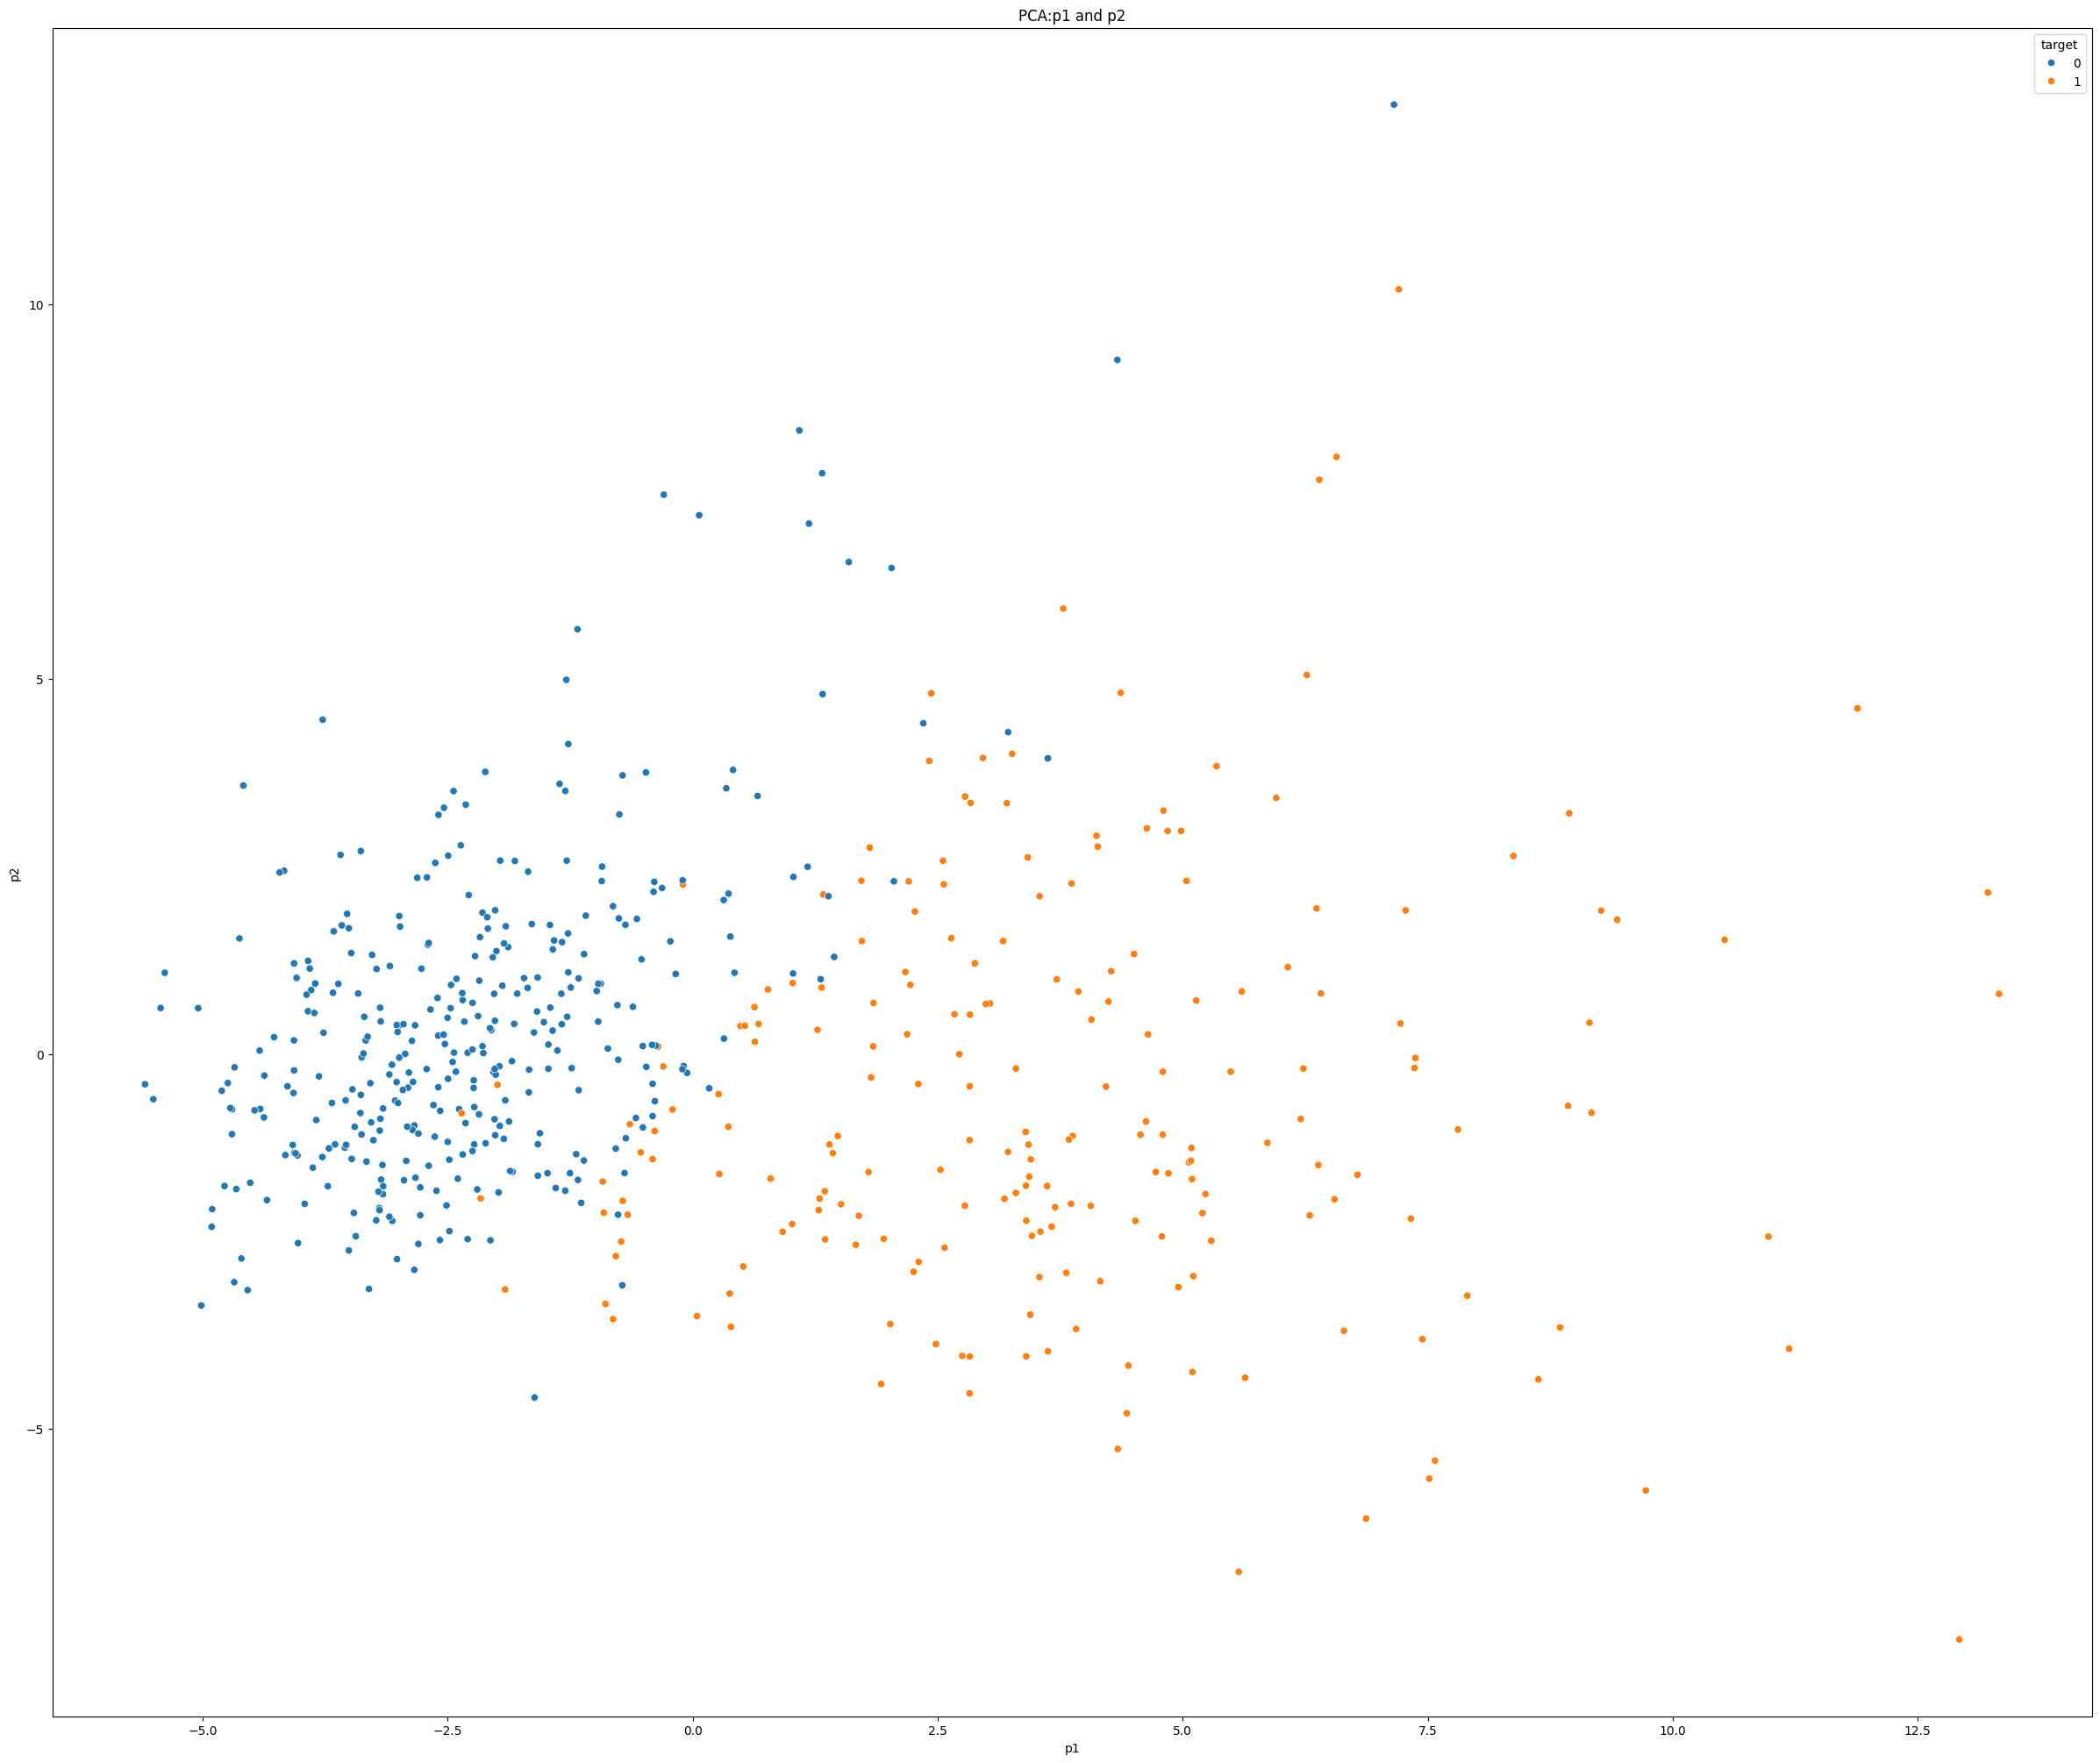

In [111]:
sns.scatterplot(x="p1",y="p2",hue="target",data=pca_data)
plt.title("PCA:p1 and p2")
plt.show()

In [112]:
X_train_pca,X_test_pca,Y_train_pca,Y_test_pca=train_test_split(X_reduced_pca,y,random_state=42,test_size=0.3)
grid_pca=Knn_Best_Params(X_train_pca,X_test_pca,Y_train_pca,Y_test_pca)

Best Score 0.9417105263157893 with parameters {'n_neighbors': 13, 'p': 2, 'weights': 'uniform'}

Test Score 0.9181286549707602 Train Score 0.9445843828715366
